# Feather Fall: Forecasting Conservation Risk Levels for Birds in India

## Problem Statement 
##### India is home to over 1,300 bird species, many of which are increasingly threatened by habitat loss, climate change, and human activity. With conservation resources limited, it's critical to prioritize efforts toward species that are most at risk. However, determining which species need immediate attention remains a significant challenge.
##### This project aims to build a machine learning model that classifies Indian bird species into three conservation concern levels — Low, Moderate, or High — using ecological traits, population trends, migratory behavior, diet, and other biological indicators. By leveraging data-driven predictions, this tool supports early identification of vulnerable species, enabling conservationists and policymakers to take targeted, proactive action. Through this approach, we seek to enhance the effectiveness of conservation planning and contribute to preserving India's avian biodiversity.

## Goal 
##### To support effective bird conservation in India by identifying species at higher conservation risk through predictive modeling, enabling early intervention and better resource allocation.

## Project Objective 
##### To build a machine learning model that classifies Indian bird species into conservation concern levels (Low, Moderate, High) using ecological features such as population trends, diet type, migratory behavior, and distribution range. This model will help prioritize species and regions for focused conservation action

#### Import Libraries 

In [3]:
# Core Libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import iplot

import cufflinks as cf             #connect pandas with plotly for interactive plotting
import plotly.express as px        #A high-level API for quick interactive plotting 
 # to show up directly to jupyter nb
%matplotlib inline                

from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot

# Jupyter Notebook Setup
init_notebook_mode(connected=True)        #plotly work in jupyter nb
cf.go_offline()                           #to make everything work locally
cf.set_config_file(world_readable=False,offline=True)

In [5]:
# Scikit-learn (ML)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score )
from sklearn.utils.multiclass import unique_labels
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ML Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


## Load the Data

In [7]:
birds_df = pd.read_csv("Birds_info.csv")

In [8]:
birds_df.head()

,Serial Number,Common Name (India Checklist),Scientific Name (India Checklist),Common Name (eBird 2018),Common Name (eBird 2019),Group,Order,Family,IUCN Status,WLPA Schedule,...,Migratory Status,Diet,Waterbirds,Raptors,Scavengers,Raptors Composite,Waterbirds Composite,Habitat Composite,Endemicity Composite,Diet Composite
0,1,Fulvous Whistling Duck,Dendrocygna bicolor,Fulvous Whistling-Duck,Fulvous Whistling-Duck,Waterfowl,Anseriformes,"Anatidae (Ducks, Geese, and Waterfowl)",Least Concern,Schedule-I,...,Resident,PlantSeed,X,NaN,NaN,NaN,Ducks & Geese,Wetlands,NaN,NaN
1,2,Lesser Whistling Duck,Dendrocygna javanica,Lesser Whistling-Duck,Lesser Whistling-Duck,Waterfowl,Anseriformes,"Anatidae (Ducks, Geese, and Waterfowl)",Least Concern,Schedule-IV,...,Resident,PlantSeed,X,NaN,NaN,NaN,Ducks & Geese,Wetlands,Resident-Non-Endemics,NaN
2,3,Bar-headed Goose,Anser indicus,Bar-headed Goose,Bar-headed Goose,Waterfowl,Anseriformes,"Anatidae (Ducks, Geese, and Waterfowl)",Least Concern,Schedule-IV,...,Migratory-Local,PlantSeed,X,NaN,NaN,NaN,Ducks & Geese,Wetlands,NaN,NaN
3,4,Greylag Goose,Anser anser,Graylag Goose,Graylag Goose,Waterfowl,Anseriformes,"Anatidae (Ducks, Geese, and Waterfowl)",Least Concern,Schedule-IV,...,Migratory-Long-Distance,PlantSeed,X,NaN,NaN,NaN,Ducks & Geese,Wetlands,NaN,NaN
4,5,Comb Duck,Sarkidiornis melanotos,Knob-billed Duck,Knob-billed Duck,Waterfowl,Anseriformes,"Anatidae (Ducks, Geese, and Waterfowl)",Least Concern,Schedule-IV,...,Resident,PlantSeed,X,NaN,NaN,NaN,Ducks & Geese,Wetlands,Resident-Non-Endemics,NaN


In [9]:
birds_name = pd.read_csv("Birds_name_state_wise1.csv")
birds_name.head()

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chattisgarh,Delhi,Goa,Gujrat,Haryana,Himachal Pradesh,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
0,Fulvous Whistling Duck,Fulvous Whistling Duck,Fulvous Whistling Duck,Fulvous Whistling Duck,Lesser Whistling Duck,Lesser Whistling Duck,Lesser Whistling Duck,Fulvous Whistling Duck,Lesser Whistling Duck,Lesser Whistling Duck,...,Fulvous Whistling Duck,Lesser Whistling Duck,Lesser Whistling Duck,Bar-headed Goose,Fulvous Whistling Duck,Fulvous Whistling Duck,Fulvous Whistling Duck,Lesser Whistling Duck,Lesser Whistling Duck,Fulvous Whistling Duck
1,Lesser Whistling Duck,Lesser Whistling Duck,Lesser Whistling Duck,Lesser Whistling Duck,Bar-headed Goose,Bar-headed Goose,Bar-headed Goose,Lesser Whistling Duck,Bar-headed Goose,Bar-headed Goose,...,Lesser Whistling Duck,Bar-headed Goose,Bar-headed Goose,Ruddy Shelduck,Lesser Whistling Duck,Lesser Whistling Duck,Lesser Whistling Duck,Bar-headed Goose,Bar-headed Goose,Lesser Whistling Duck
2,Bar-headed Goose,Bar-headed Goose,Bar-headed Goose,Bar-headed Goose,Greylag Goose,Greylag Goose,Knob-billed Duck,Bar-headed Goose,Greylag Goose,Greylag Goose,...,Bar-headed Goose,Greylag Goose,Greylag Goose,Gadwall,Bar-headed Goose,Bar-headed Goose,Knob-billed Duck,Greylag Goose,Greylag Goose,Bar-headed Goose
3,Knob-billed Duck,Greylag Goose,Greylag Goose,Greylag Goose,Knob-billed Duck,Knob-billed Duck,Ruddy Shelduck,Greylag Goose,Knob-billed Duck,Knob-billed Duck,...,Greylag Goose,Knob-billed Duck,Knob-billed Duck,Eurasian Wigeon,Greylag Goose,Greylag Goose,Cotton Pygmy Goose,Knob-billed Duck,Knob-billed Duck,Greylag Goose
4,Ruddy Shelduck,Ruddy Shelduck,Knob-billed Duck,Knob-billed Duck,Ruddy Shelduck,Ruddy Shelduck,Cotton Pygmy Goose,Knob-billed Duck,Ruddy Shelduck,Ruddy Shelduck,...,Knob-billed Duck,Ruddy Shelduck,Ruddy Shelduck,Mallard,Knob-billed Duck,Knob-billed Duck,Garganey,Ruddy Shelduck,Ruddy Shelduck,Knob-billed Duck


## Understanding the Data

In [11]:
birds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 33 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Serial Number                                         867 non-null    int64  
 1   Common Name (India Checklist)                         867 non-null    object 
 2   Scientific Name (India Checklist)                     867 non-null    object 
 3   Common Name (eBird 2018)                              867 non-null    object 
 4   Common Name (eBird 2019)                              867 non-null    object 
 5   Group                                                 865 non-null    object 
 6   Order                                                 865 non-null    object 
 7   Family                                                865 non-null    object 
 8   IUCN Status                                           867 no

In [12]:
birds_df.shape

(867, 33)

In [13]:
birds_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693 entries, 0 to 692
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Andhra Pradesh     411 non-null    object
 1   Arunachal Pradesh  594 non-null    object
 2   Assam              565 non-null    object
 3   Bihar              313 non-null    object
 4   Chattisgarh        363 non-null    object
 5   Delhi              337 non-null    object
 6   Goa                400 non-null    object
 7   Gujrat             412 non-null    object
 8   Haryana            447 non-null    object
 9   Himachal Pradesh   507 non-null    object
 10  Jammu & kashmir    421 non-null    object
 11  Jharkhand          299 non-null    object
 12  Karnataka          452 non-null    object
 13  Kerala             425 non-null    object
 14  Madhya Pradesh     392 non-null    object
 15  Maharashtra        459 non-null    object
 16  Manipur            431 non-null    object
 1

In [14]:
birds_name.shape

(693, 30)

In [15]:
birds_df.describe()

,Serial Number,Long-term Trend (%),Long-term Trend CI (%),Current Annual Change (%),Current Annual Change CI (%),"Distribution Range Size (units of 10,000 sq. km.)","Distribution Range Size CI (units of 10,000 sq. km.)"
count,867.000000,487.000000,487.000000,677.000000,677.000000,856.000000,856.000000
mean,434.000000,-23.771736,35.660908,-1.508480,14.041841,35.951108,0.075573
std,250.425638,40.640144,35.405406,10.239282,21.119122,50.519018,0.035236
min,1.000000,-97.040887,0.914415,-24.033897,1.185877,0.000900,0.000000
25%,217.500000,-53.361035,15.724150,-5.989720,4.787951,5.653592,0.059075
50%,434.000000,-30.045127,26.164983,-2.535760,8.648848,13.659506,0.074500
75%,650.500000,-1.467697,42.704433,1.640885,16.217987,37.720139,0.090525
max,867.000000,171.255544,368.877213,191.156998,400.802847,224.354113,0.441700


In [16]:
birds_name.describe()

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chattisgarh,Delhi,Goa,Gujrat,Haryana,Himachal Pradesh,...,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
count,411,594,565,313,363,337,400,412,447,507,...,385,367,392,452,435,385,301,458,603,693
unique,411,594,565,313,363,337,400,412,447,507,...,385,367,392,452,435,385,301,458,603,693
top,Fulvous Whistling Duck,Fulvous Whistling Duck,Fulvous Whistling Duck,Fulvous Whistling Duck,Lesser Whistling Duck,Lesser Whistling Duck,Lesser Whistling Duck,Fulvous Whistling Duck,Lesser Whistling Duck,Lesser Whistling Duck,...,Fulvous Whistling Duck,Lesser Whistling Duck,Lesser Whistling Duck,Bar-headed Goose,Fulvous Whistling Duck,Fulvous Whistling Duck,Fulvous Whistling Duck,Lesser Whistling Duck,Lesser Whistling Duck,Fulvous Whistling Duck
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


## Data Cleaning

###  Dropping Unwanted Columns

In [19]:
birds_df = birds_df.drop(['Serial Number',
                          'Common Name (India Checklist)',
                          'Scientific Name (India Checklist)',
                          'Common Name (eBird 2018)',
                          'Order',
                          'Family',
                          'Distribution Range Size (units of 10,000 sq. km.)',
                          'Distribution Range Size CI (units of 10,000 sq. km.)',
                          'Diet Composite',
                          'Assessed Primarily Based On',
                          'Waterbirds Composite',
                          'Raptors Composite'                          
                         ] 
                         ,axis = 1)

### Renaming Columns Name

In [21]:
birds_df.rename(columns={
    'Common Name (eBird 2019)': 'bird_name',
    'Group': 'group',
    'IUCN Status': 'iucn_status',
    'WLPA Schedule': 'wlpa_schedule',
    'Analysed Long-term': 'analysed_long_term',
    'Analysed Current': 'analysed_current',
    'Long-term Trend (%)': 'long_term_trend',
    'Long-term Trend CI (%)': 'long_term_trend_ci',
    'Current Annual Change (%)': 'current_annual_change',
    'Current Annual Change CI (%)': 'current_annual_change_ci',
    'Long-term Status': 'long_term_status',
    'Current Status': 'current_status',
    'Distribution Status': 'distribution_status',
    'Status of Conservation Concern': 'status_of_conservation_concern',
    'Migratory Status': 'migratory_status',
    'Diet': 'diet',
    'Waterbirds': 'waterbirds',
    'Raptors': 'raptors',
    'Scavengers': 'scavengers',
    'Habitat Composite': 'habitat_type',
    'Endemicity Composite': 'endemicity_type',
}, inplace=True)

### Sorting the Dataset

In [23]:
birds_df=birds_df.sort_values(by='bird_name').reset_index(drop=True)
birds_df['bird_name'].head(10)

0         Abbott's Babbler
1    Aberrant Bush Warbler
2     Alexandrine Parakeet
3          Alpine Accentor
4             Alpine Swift
5            Alpine Thrush
6           Altai Accentor
7              Amur Falcon
8           Andaman Bulbul
9           Andaman Coucal
Name: bird_name, dtype: object

In [24]:
birds_name=birds_name.apply(lambda col:sorted(map(str, col)))

### Cleaning Birds Name

In [26]:
# Clean bird names in birds_df 
birds_df['bird_name'] = (
    birds_df['bird_name'].str.strip().str.lower().str.replace('-', ' ').str.replace(r'\s+', ' ', regex=True)
)
birds_df['bird_name'].head(10)

0         abbott's babbler
1    aberrant bush warbler
2     alexandrine parakeet
3          alpine accentor
4             alpine swift
5            alpine thrush
6           altai accentor
7              amur falcon
8           andaman bulbul
9           andaman coucal
Name: bird_name, dtype: object

In [27]:
# Clean statewise bird names
birds_name.columns = birds_name.columns.str.strip()
birds_name = birds_name.apply(lambda col: (col.astype(str).str.strip().str.lower().str.replace('-', ' ').str.replace(r'\s+', ' ', regex=True)
))

### Checking Duplicate

In [29]:
birds_df[birds_df.duplicated()]

,bird_name,group,iucn_status,wlpa_schedule,analysed_long_term,analysed_current,long_term_trend,long_term_trend_ci,current_annual_change,current_annual_change_ci,...,current_status,distribution_status,status_of_conservation_concern,migratory_status,diet,waterbirds,raptors,scavengers,habitat_type,endemicity_type


### Checking Null Values 

In [31]:
birds_df.isna().sum()

bird_name                           0
group                               2
iucn_status                         0
wlpa_schedule                       0
analysed_long_term                382
analysed_current                  192
long_term_trend                   380
long_term_trend_ci                380
current_annual_change             190
current_annual_change_ci          190
long_term_status                    5
current_status                      5
distribution_status                 5
status_of_conservation_concern      5
migratory_status                    0
diet                                9
waterbirds                        741
raptors                           812
scavengers                        857
habitat_type                        0
endemicity_type                   450
dtype: int64

#### filling null value with mode

In [33]:
mode_fill_cols = [
    'group',
    'long_term_status', 
    'current_status',
    'distribution_status',
    'status_of_conservation_concern', 
    'diet'
]
for col in mode_fill_cols:
    birds_df[col] = birds_df[col].fillna(birds_df[col].mode()[0])

#### filling null value with zero

In [35]:
zero_fill_cols = [
    'analysed_long_term',
    'analysed_current',
    'long_term_trend',
    'long_term_trend_ci',
    'current_annual_change',
    'current_annual_change_ci',
    'waterbirds',
    'raptors',
    'scavengers'
]
for col in zero_fill_cols:
    birds_df[col] = birds_df[col].fillna(0)

In [36]:
birds_df['endemicity_type']=birds_df['endemicity_type'].fillna("Unknown")
birds_df['endemicity_type'].isna().sum()

0

In [37]:
birds_df.isna().sum()

bird_name                         0
group                             0
iucn_status                       0
wlpa_schedule                     0
analysed_long_term                0
analysed_current                  0
long_term_trend                   0
long_term_trend_ci                0
current_annual_change             0
current_annual_change_ci          0
long_term_status                  0
current_status                    0
distribution_status               0
status_of_conservation_concern    0
migratory_status                  0
diet                              0
waterbirds                        0
raptors                           0
scavengers                        0
habitat_type                      0
endemicity_type                   0
dtype: int64

### Converting Columns Datatype

In [39]:
# Converting Columns to Binary values 
binary_indices = [4,5,16,17,18]
binary_cols = [birds_df.columns[i] for i in binary_indices]
for col in binary_cols:
    birds_df[col] = birds_df[col].apply(lambda x: 1 if str(x).strip().upper() == 'X' else 0)


In [40]:
def get_bird_type(row):
    if row['scavengers'] == 1 & row['raptors']==1:
        return 'scavenger'
    elif row['raptors'] == 1:
        return 'raptor'
    elif row['waterbirds'] == 1:
        return 'waterbird'
    
    else:
        return '0'

# Create the new column
birds_df['bird_type'] = birds_df.apply(get_bird_type, axis=1)

# Now you can drop the old columns if not needed
birds_df.drop(columns=['raptors', 'waterbirds', 'scavengers'], inplace=True)


In [41]:
# Converting Object Columns to Category
category_indices = [1, 2, 3,10,11,12,13,14,15,16,17,18]
cols_to_category = [birds_df.columns[i] for i in category_indices]
birds_df[cols_to_category] = birds_df[cols_to_category].astype('category')


In [42]:
birds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   bird_name                       867 non-null    object  
 1   group                           867 non-null    category
 2   iucn_status                     867 non-null    category
 3   wlpa_schedule                   867 non-null    category
 4   analysed_long_term              867 non-null    int64   
 5   analysed_current                867 non-null    int64   
 6   long_term_trend                 867 non-null    float64 
 7   long_term_trend_ci              867 non-null    float64 
 8   current_annual_change           867 non-null    float64 
 9   current_annual_change_ci        867 non-null    float64 
 10  long_term_status                867 non-null    category
 11  current_status                  867 non-null    category
 12  distribution_status   

# EDA (Exploratory Data Analysis)

## Distribution / General Insights

###  Top 10 Bird Group

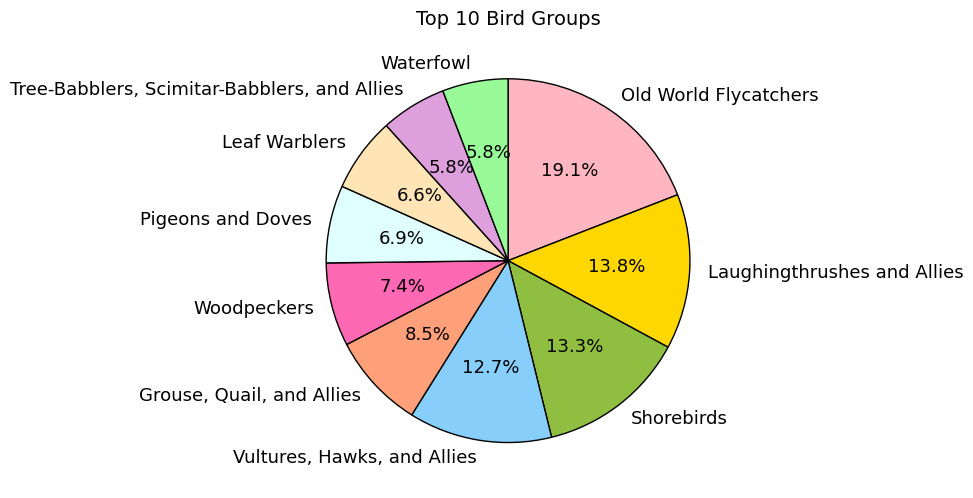

In [46]:
# Top 10 Birds Group 
top_groups = birds_df['group'].value_counts().head(10).reset_index()
top_groups.columns = ['Bird Group', 'Count']
colors = [
    '#FFB6C1', '#FFD700', '#90BE40', '#87CEFA', '#FFA07A',
    '#FF69B4', '#E0FFFF', '#FFE4B5', '#DDA0DD', '#98FB98'
]
plt.figure(figsize=(9, 9))
wedges, texts, autotexts = plt.pie(
    top_groups['Count'],
    labels=top_groups['Bird Group'],
    autopct='%1.1f%%',
    startangle=90,
    counterclock= False,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

# Beautify text
for text in texts:
    text.set_fontsize(13)
for autotext in autotexts:
    autotext.set_fontsize(13)


plt.title('Top 10 Bird Groups', fontsize=14)
plt.tight_layout()
plt.show()

##### Old World Flycatchers have the highest proportion and Watefowl, Tree-Babblers, Scimitar-Babblers and Allies have the lowest proportion

###  Bird Endemicity Type Distribution

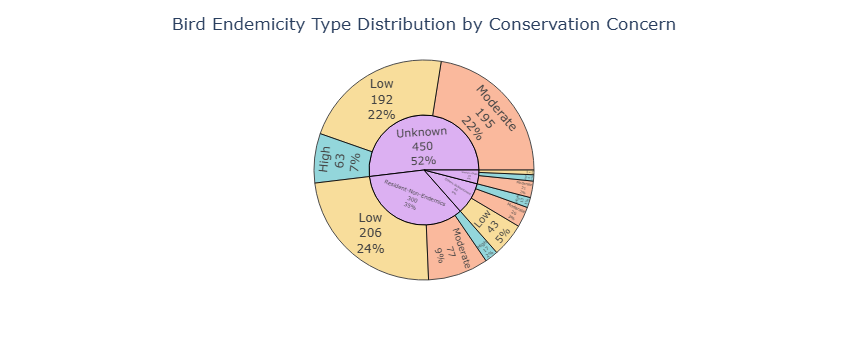

In [49]:
# Convert categorical columns to string before grouping
birds_df['endemicity_type'] = birds_df['endemicity_type'].astype(str)
birds_df['status_of_conservation_concern'] = birds_df['status_of_conservation_concern'].astype(str)

# Create counts for sunburst
endemicity_counts = birds_df.groupby(
    ['endemicity_type', 'status_of_conservation_concern']
).size().reset_index(name='count')
# Sunburst with pastel colors + black edges + values
fig = px.sunburst(
    endemicity_counts,
    path=["endemicity_type", "status_of_conservation_concern"],
    values="count",
    color="status_of_conservation_concern",
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Add black borders
fig.update_traces(
    marker=dict(line=dict(color='black', width=1)),
    textinfo="label+value+percent entry"   # show label, count & percentage
)

# Layout
fig.update_layout(
    title="Bird Endemicity Type Distribution by Conservation Concern",  title_x=0.5,
    paper_bgcolor="white",
    plot_bgcolor="white"
)

fig.show()

##### Over half of the species (52%) fall into the Unknown endemicity category.

##### Among known categories, Resident-Non-Endemics are most common.

##### Across groups, most species are in Low or Moderate conservation concern, while relatively few are categorized as High concern.

### Habitat Type Distribution

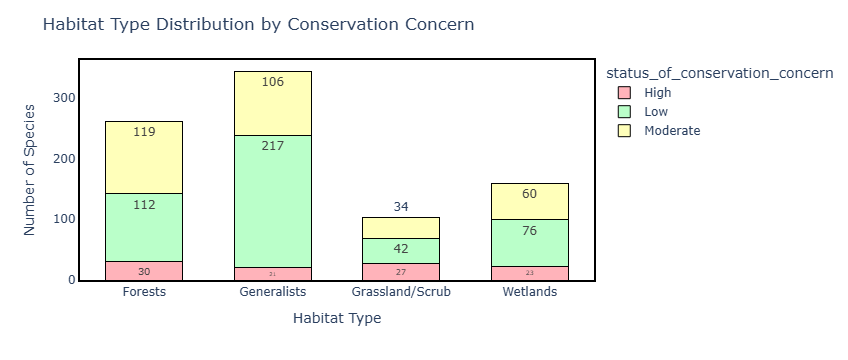

In [52]:
# Count by Habitat Type → Conservation Concern
habitat_counts = birds_df.groupby(
    ["habitat_type", "status_of_conservation_concern"]
)["bird_name"].count().reset_index()

habitat_counts.rename(columns={"bird_name": "count"}, inplace=True)

# Custom pastel colors
custom_pastel = ["#FFB3BA", "#BAFFC9", "#FFFFBA"]

# Stacked Bar Chart
fig = px.bar(
    habitat_counts,
    x="habitat_type",
    y="count",
    color="status_of_conservation_concern",
    text="count",   # show values
    color_discrete_sequence=custom_pastel
)
# Add black edges 
fig.update_traces(
    marker=dict(line=dict(color='black', width=1)),
    width=0.6
)

fig.update_layout(
    title="Habitat Type Distribution by Conservation Concern",
    xaxis_title="Habitat Type",
    yaxis_title="Number of Species",
    paper_bgcolor="white",
    plot_bgcolor="white",
    barmode="stack",
    showlegend=True,
    xaxis=dict(showline=True, linewidth=2, linecolor='black', mirror=True),
    yaxis=dict(showline=True, linewidth=2, linecolor='black', mirror=True)
    
)

fig.show()

##### Generalist species dominate, followed by forest species.
##### In every habitat type, the majority of species are under Low or Moderate concern, while High concern species are the least common.

###  Unique Bird Groups per Conservation Concern

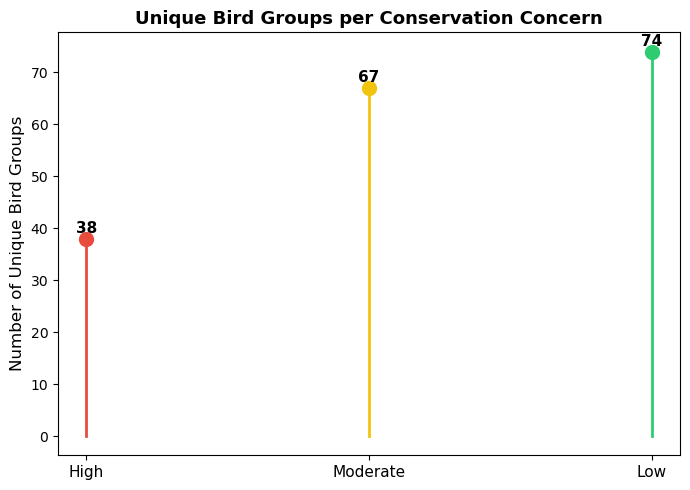

In [55]:
# Prepare unique group-concern pair count
group_concern = birds_df[['group', 'status_of_conservation_concern']].drop_duplicates()
group_concern_count = group_concern['status_of_conservation_concern'].value_counts().reindex(['High', 'Moderate', 'Low'])

# Define custom colors
colors = {
    'High': '#E74C3C',       # Red
    'Moderate': '#F1C40F',   # Yellow
    'Low': '#2ECC71'         # Green
}

# Set white background
plt.style.use('default')
plt.figure(figsize=(7, 5), facecolor='white')
ax = plt.gca()
ax.set_facecolor("white")

# Plotting lollipop chart
for i, category in enumerate(group_concern_count.index):
    count = group_concern_count[category]
    plt.plot([i, i], [0, count], color=colors[category], linewidth=2)
    plt.plot(i, count, 'o', color=colors[category], markersize=10)
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=11, fontweight='bold')

# Customizing axes and labels
plt.xticks(range(len(group_concern_count.index)), group_concern_count.index, fontsize=11)
plt.ylabel("Number of Unique Bird Groups", fontsize=12)
plt.title("Unique Bird Groups per Conservation Concern", fontsize=13, weight='bold')

# Remove grid completely
plt.grid(False)

plt.tight_layout()
plt.show()

##### The number of unique bird groups is highest under low conservation concern (74 groups), followed by moderate concern (67 groups), while the fewest groups fall under high concern (38 groups), indicating that only a smaller fraction of bird groups face severe conservation risks.

###  Bird Type Distribution

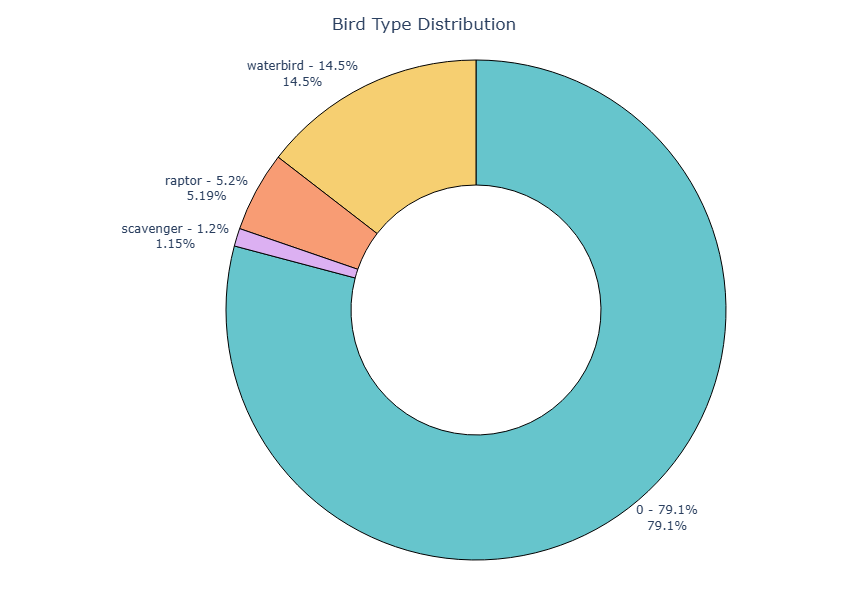

In [58]:
# Step 1: Count bird types
bird_type_count = birds_df['bird_type'].value_counts().reset_index()
bird_type_count.columns = ['bird_type', 'count']

# Step 2: Ensure correct type for concatenation
bird_type_count['bird_type'] = bird_type_count['bird_type'].astype(str)
bird_type_count['percentage'] = round((bird_type_count['count'] / bird_type_count['count'].sum()) * 100, 1)
bird_type_count['label'] = bird_type_count['bird_type'] + ' - ' + bird_type_count['percentage'].astype(str) + '%'

# Step 3: Donut chart
fig = px.pie(
    bird_type_count,
    names='label',
    values='count',
    hole=0.5,
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title='Bird Type Distribution'
)

# Step 4: Improve size and text layout
fig.update_traces(
    textinfo='percent+label',
    textposition='inside',
    marker=dict(line=dict(color='white', width=2))
)
fig.update_traces(
    textposition='outside',
    marker_line_width=1,
    marker_line_color='black')
fig.update_layout(
    showlegend=False,
    width=600,
    height=600,  # Perfect square to avoid squishing
    margin=dict(t=60, b=40, l=40, r=40),
    title_x=0.5,
)

fig.show()

### Bird Endemicity Type Distribution

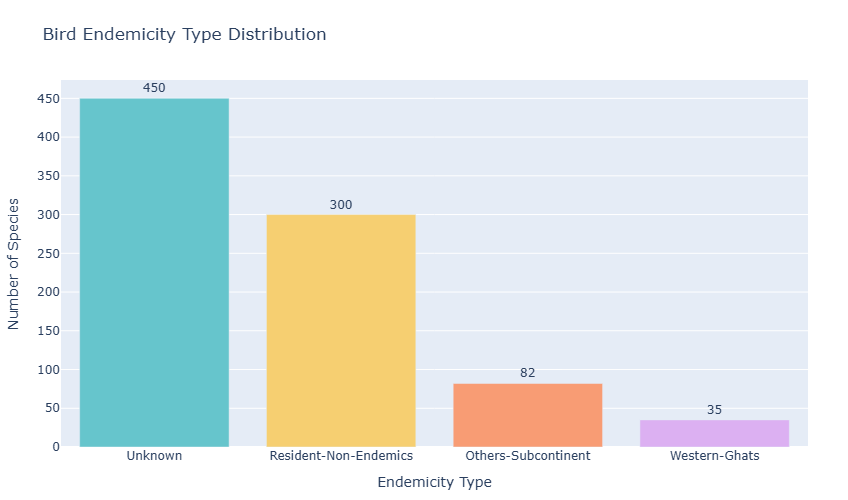

In [60]:
# Step 1: Get count from birds_df
end_df = birds_df['endemicity_type'].value_counts().reset_index()
end_df.columns = ['endemicity_type', 'count']

# Step 2: Plot bar chart
fig = px.bar(
    end_df,
    x='endemicity_type',
    y='count',
    text='count',
    color='endemicity_type',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title='Bird Endemicity Type Distribution'
)

fig.update_traces(textposition='outside')

fig.update_layout(
    xaxis_title='Endemicity Type',
    yaxis_title='Number of Species',
    showlegend=False,
    height=500,
    width=800,
    margin=dict(l=40, r=40, t=80, b=40)
)

fig.show()

## Conservation Status

### IUCN Status Distribution

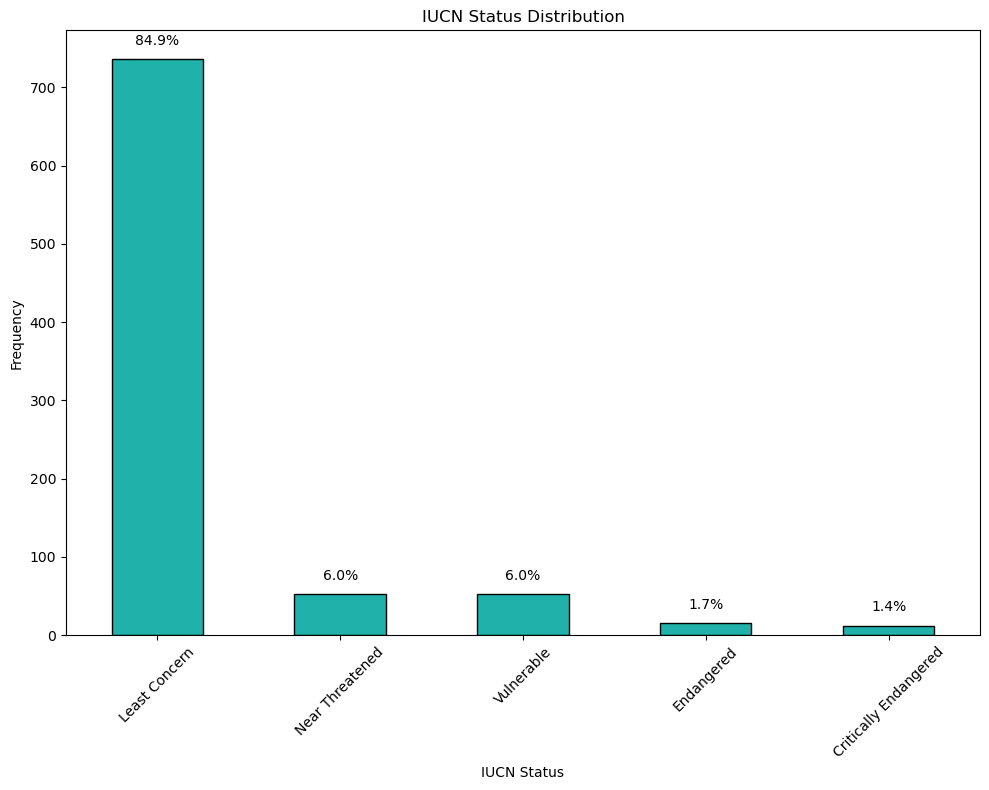

In [63]:
# Value counts and percentages
status_counts = birds_df['iucn_status'].value_counts()
status_percent = birds_df['iucn_status'].value_counts(normalize=True) * 100

# Bar plot
plt.figure(figsize=(10, 8))
ax = status_counts.plot(kind='bar', edgecolor='black', color='lightseagreen')
plt.title('IUCN Status Distribution')
plt.xlabel('IUCN Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate percentages
for i, (count, percent) in enumerate(zip(status_counts, status_percent)):
    ax.text(i, count + max(status_counts)*0.02, f'{percent:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()

##### About 84.9% of species are Least concern (These species are not currently at significant risk of extinction.) and 1.4% are Critically Endangered (These are at extremely high risk of extinction in the immediate future.)

### WLPA Schedule Distribution

- Schedule I: Endangered species needing full protection.
- Schedule IV: Non-endangered but protected species.
- Schedule V: Vermin—can be hunted without legal consequences.

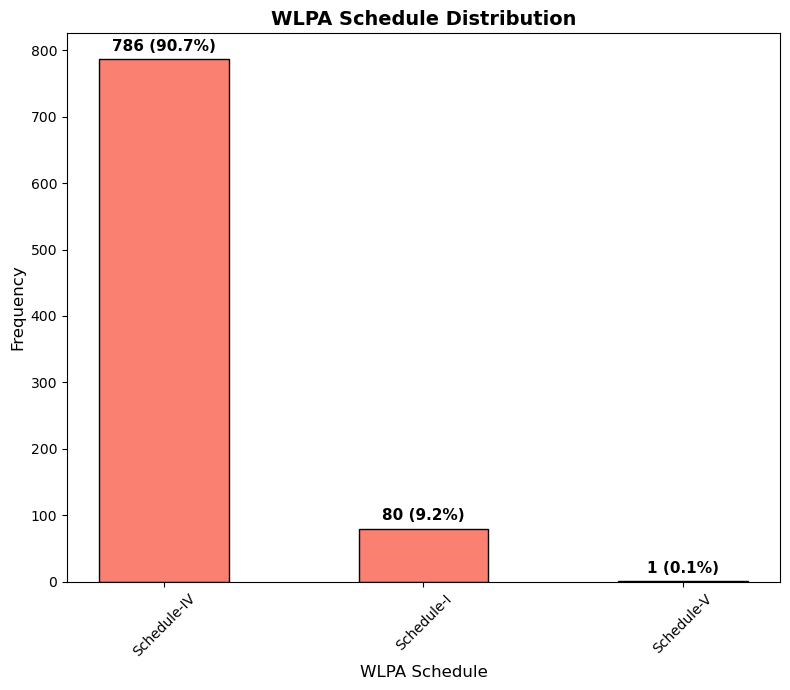

In [67]:
# Calculate counts and percentages
schedule_counts = birds_df['wlpa_schedule'].value_counts()
schedule_percent = birds_df['wlpa_schedule'].value_counts(normalize=True) * 100

# Bar plot
plt.figure(figsize=(8, 7))
bars = plt.bar(schedule_counts.index, schedule_counts.values, 
               color='salmon', edgecolor='black',width=0.5)

plt.title('WLPA Schedule Distribution', fontsize=14, weight='bold')
plt.xlabel('WLPA Schedule', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)

# Annotate values (Count + % on top of each bar)
for bar, percent in zip(bars, schedule_percent):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,   # center align
             height + (0.01 * schedule_counts.max()),  # thoda upar
             f"{height} ({percent:.1f}%)", 
             ha='center', va='bottom', fontsize=11, weight="bold")

plt.tight_layout()
plt.show()


In [68]:
pd.crosstab(birds_df['iucn_status'],birds_df['wlpa_schedule'])

wlpa_schedule,Schedule-I,Schedule-IV,Schedule-V
iucn_status,,,
Critically Endangered,8,4,0
Endangered,6,9,0
Least Concern,39,696,1
Near Threatened,11,41,0
Vulnerable,16,36,0


### IUCN Status vs Migratory Status

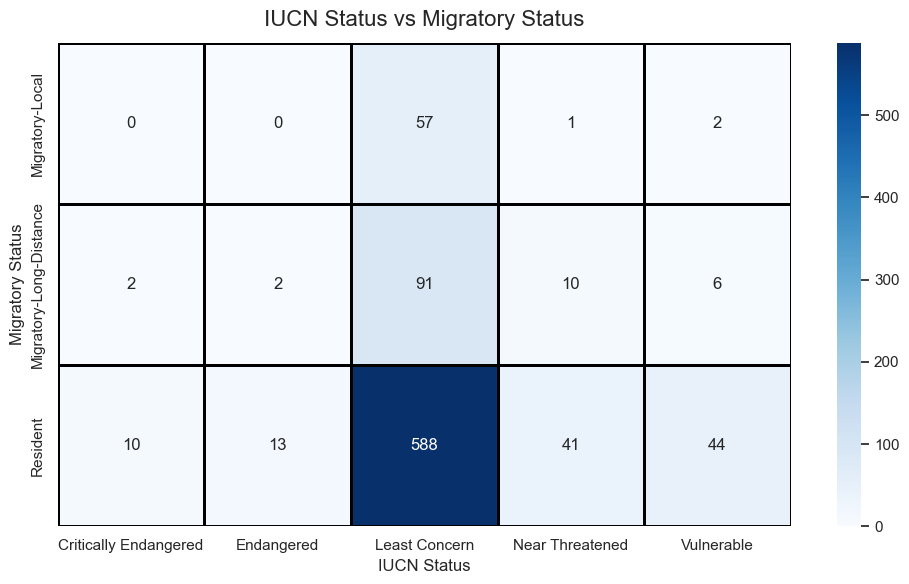

In [70]:
# Create pivot table
heatmap_data = pd.crosstab(birds_df['migratory_status'], birds_df['iucn_status'])

# Set style for clean white background
sns.set(style="white")

plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt='d', 
    cmap='Blues',         # blue color scale
    linewidths=1,         # borders between cells
    linecolor='black',    # cell border color
    cbar=True             # show color bar
)

# Titles and labels
plt.title("IUCN Status vs Migratory Status", fontsize=16, pad=12)
plt.xlabel("IUCN Status", fontsize=12)
plt.ylabel("Migratory Status", fontsize=12)

plt.tight_layout()
plt.show()

##### Most species regardless of migratory status fall under Least Concern, with Resident species making up the majority in all categories, including the most threatened ones.

### Habitat Type vs IUCN Status

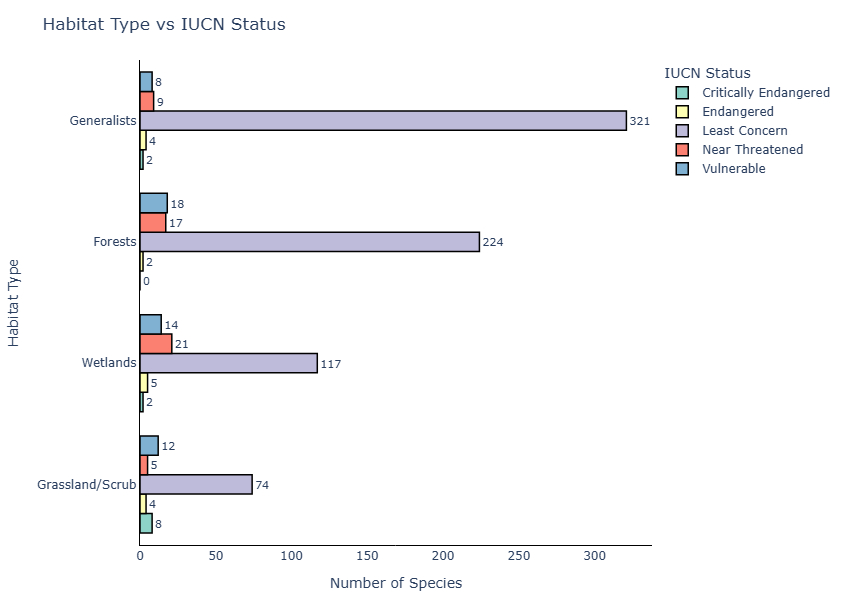

In [73]:
# Group data
habitat_df = birds_df.groupby(['habitat_type', 'iucn_status']).size().reset_index(name='count')

# Sort habitat types by total count for better visual flow
habitat_order = habitat_df.groupby('habitat_type')['count'].sum().sort_values(ascending=False).index.tolist()

# Plot
fig = px.bar(
    habitat_df, 
    y='habitat_type',
    x='count',
    color='iucn_status',
    barmode='group',
    orientation='h',
    title='Habitat Type vs IUCN Status',
    text='count',
    category_orders={'habitat_type': habitat_order},
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Update traces for text and bar edges
fig.update_traces(
    textposition='outside', 
    textfont_size=11,
    marker_line_color='black',  # edge color
    marker_line_width=1.5
)

# Update layout for clean white background + axis lines
fig.update_layout(
    xaxis_title='Number of Species',
    yaxis_title='Habitat Type',
    legend_title='IUCN Status',
    bargap=0.2,
    height=600,
    width=900,
    margin=dict(l=80, r=40, t=60, b=40),
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showgrid=False, zeroline=False, showline=True, linecolor='black', linewidth=1),
    yaxis=dict(showgrid=False, zeroline=False, showline=True, linecolor='black', linewidth=1),
    font=dict(size=12)
)

fig.show()


##### Most species in all habitats are listed as Least Concern, with only a small proportion falling under threatened categories.

### IUCN Status vs WLPA Schedule

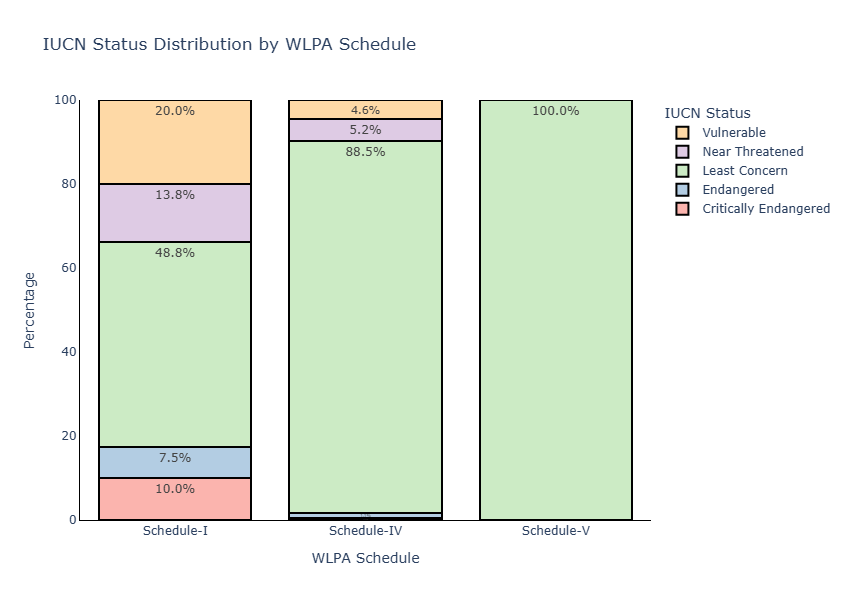

In [76]:
# Step 1: Group and normalize
grouped_df = birds_df.groupby(['wlpa_schedule', 'iucn_status']).size().reset_index(name='count')
grouped_df['percent'] = grouped_df.groupby('wlpa_schedule')['count'].transform(lambda x: x / x.sum() * 100)

# Step 2: Sort for consistent stacking
grouped_df = grouped_df.sort_values(by=['iucn_status', 'wlpa_schedule'])

# Step 3: Create stacked bars with borders
fig = go.Figure()

# Define pastel colors 
colors = px.colors.qualitative.Pastel1

# Map each IUCN status to a color
status_list = grouped_df['iucn_status'].unique()
color_map = {status: colors[i % len(colors)] for i, status in enumerate(status_list)}

for status in status_list:
    df_subset = grouped_df[grouped_df['iucn_status'] == status]
    fig.add_trace(go.Bar(
        x=df_subset['wlpa_schedule'],
        y=df_subset['percent'],
        name=status,
        text=[f'{p:.1f}%' for p in df_subset['percent']],
        textposition='inside',
        marker=dict(
            color=color_map[status],
            line=dict(color='black', width=2)  
        )
    ))

# Step 4: Layout tweaks
fig.update_layout(
    barmode='stack',
    title='IUCN Status Distribution by WLPA Schedule',
    xaxis=dict(title='WLPA Schedule', showgrid=False, linecolor='black'),
    yaxis=dict(title='Percentage', range=[0, 100], showgrid=True, linecolor='black'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    height=600,
    width=900,
    legend_title='IUCN Status'
)

fig.show()

##### Schedule I covers several at-risk species, whereas Schedule IV and V are dominated by Least Concern species.

### WLPA Schedule vs Conservation Concern

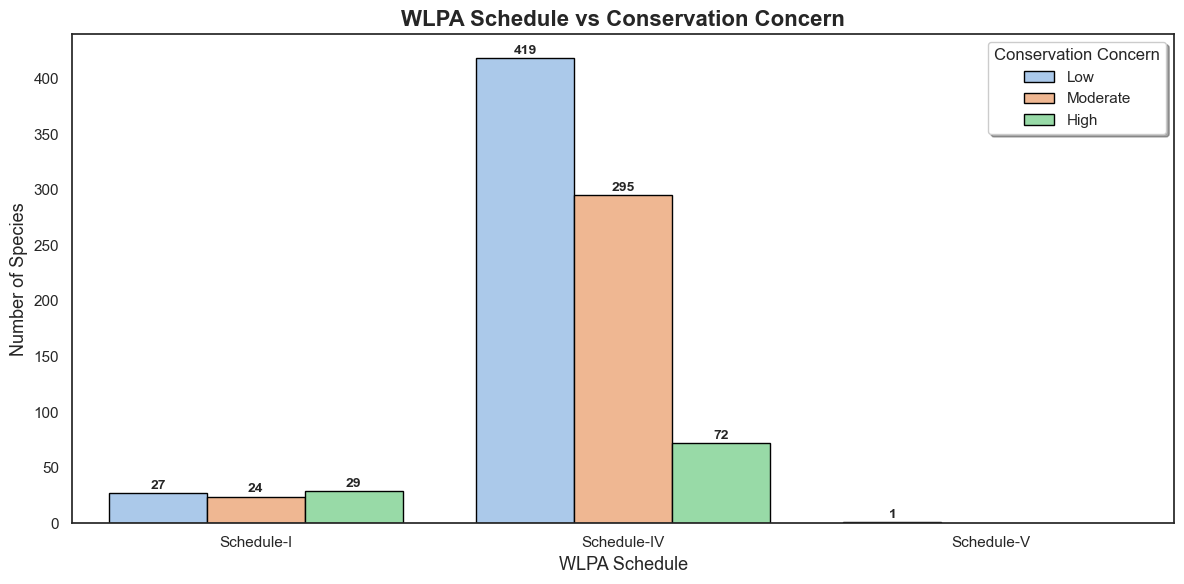

In [79]:
# Create figure and axis
plt.figure(figsize=(12, 6))

# Countplot
ax = sns.countplot(
    data=birds_df,
    x="wlpa_schedule",
    hue="status_of_conservation_concern",
    palette="pastel",  
    edgecolor="black"
)

# Titles and axis labels
plt.title("WLPA Schedule vs Conservation Concern", fontsize=16, fontweight='bold')
plt.xlabel("WLPA Schedule", fontsize=13)
plt.ylabel("Number of Species", fontsize=13)

# Rotate x-ticks if needed
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add counts above bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 1,
                f"{int(height)}",
                ha='center',
                va='bottom',
                fontsize=10,
                fontweight='bold'
            )

# Legend styling
plt.legend(
    title='Conservation Concern',
    title_fontsize=12,
    fontsize=11,
    loc='upper right',
    frameon=True,
    shadow=True
)

# Tight layout for better spacing
plt.tight_layout()

# Show plot
plt.show()

- Schedule I: Endangered species needing full protectio
- Schedule IV: Non-endangered but protected species.
- Schedule V: Vermin can be hunted without legal consequences.

##### Most bird species fall under Schedule-IV, with a large proportion at low or moderate conservation concern. Schedules I and V cover relatively few species, but Schedule-I contains a higher proportion of high-concern species compared to Schedule-IV.

## Population Trends

### Long-Term Trend Distribution

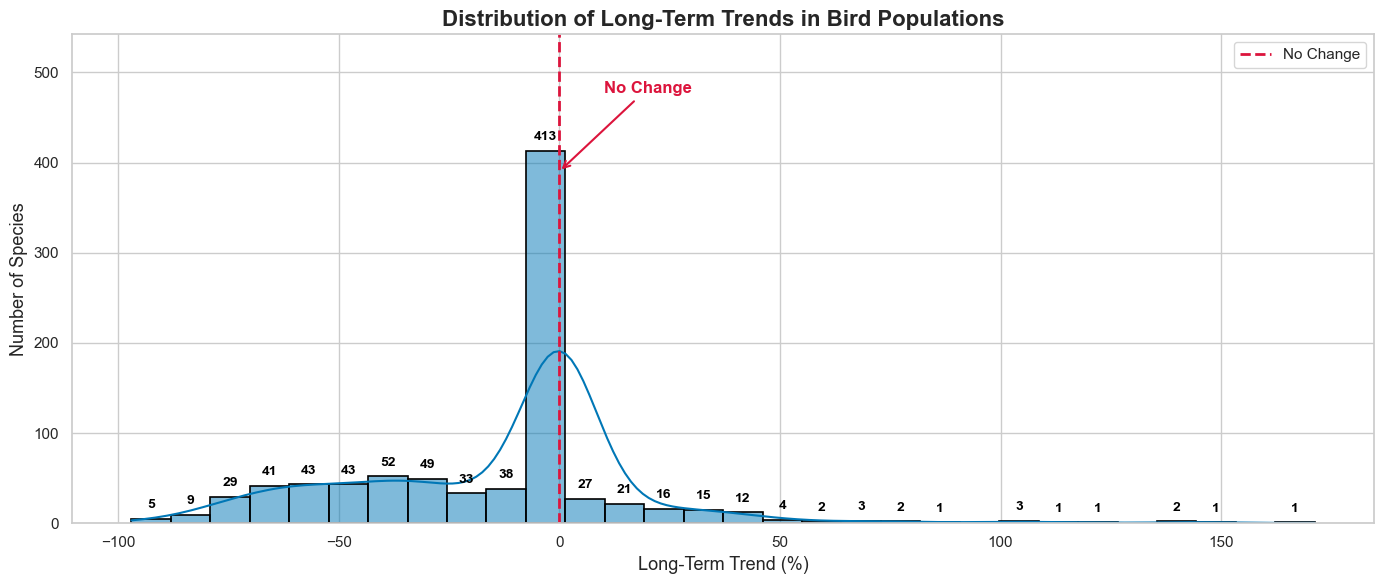

In [83]:
# Apply theme
sns.set(style="whitegrid")

# Set up the figure
plt.figure(figsize=(14, 6))

# Plot histogram with KDE
ax = sns.histplot(
    birds_df['long_term_trend'],
    bins=30,
    kde=True,
    color="#0077b6",
    edgecolor="black",
    linewidth=1.2
)

# Vertical line at 0 (no change)
plt.axvline(x=0, color='crimson', linestyle='--', linewidth=2, label='No Change')

# Get current limits
y_max = ax.get_ylim()[1]
ax.set_ylim(0, y_max * 1.25)  # Add vertical space for labels

# Add bar value annotations
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:
        x = patch.get_x() + patch.get_width() / 2
        plt.text(
            x, height + y_max * 0.02,
            f"{int(height)}", 
            ha='center', va='bottom',
            fontsize=10, fontweight='semibold', color='black'
        )

# Add annotation for no change line
plt.annotate(
    'No Change',
    xy=(0, y_max * 0.9),
    xytext=(10, y_max * 1.1),
    arrowprops=dict(arrowstyle='->', color='crimson', lw=1.5),
    fontsize=12,
    color='crimson',
    fontweight='bold'
)

# Titles and labels
plt.title('Distribution of Long-Term Trends in Bird Populations', fontsize=16, fontweight='bold')
plt.xlabel('Long-Term Trend (%)', fontsize=13)
plt.ylabel('Number of Species', fontsize=13)
plt.legend()

plt.tight_layout()
plt.show()


##### Most bird species have stable populations, but declining trends are more common than strong increases, which is a concern for conservation.

### Comparison of Analysed Long Term vs Current

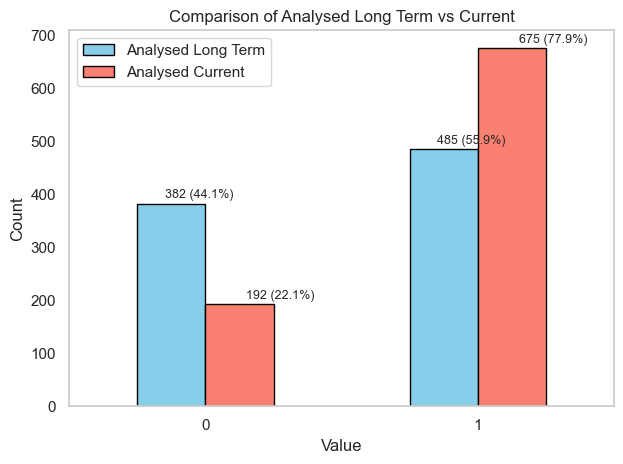

In [86]:
# Value counts
long_term = birds_df['analysed_long_term'].value_counts().sort_index()
current = birds_df['analysed_current'].value_counts().sort_index()

# Combine into a DataFrame
df_plot = pd.DataFrame({
    'Analysed Long Term': long_term,
    'Analysed Current': current
})

# Plot
ax = df_plot.plot(kind='bar', color=['skyblue', 'salmon'],edgecolor='black')
plt.title('Comparison of Analysed Long Term vs Current')
plt.xlabel('Value')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Remove grid
ax.grid(False)

# Add value and percentage labels
total_long = long_term.sum()
total_current = current.sum()

for i, (lt, ct) in enumerate(zip(long_term, current)):
    plt.text(i - 0.15, lt + 10, f'{lt} ({lt/total_long:.1%})', fontsize=9)
    plt.text(i + 0.15, ct + 10, f'{ct} ({ct/total_current:.1%})', fontsize=9)

plt.tight_layout()
plt.show()

##### There’s a shift from category 0 towards category 1 in the Current analysis compared to the Long Term analysis.

### Long-Term Trend vs Confidence Interval

In [89]:
def categorize_trend(val):
    if val > 5:
        return 'Increasing'
    elif val < -5:
        return 'Decreasing'
    else:
        return 'Stable'

birds_df['long_term_trend_category'] = birds_df['long_term_trend'].apply(categorize_trend)


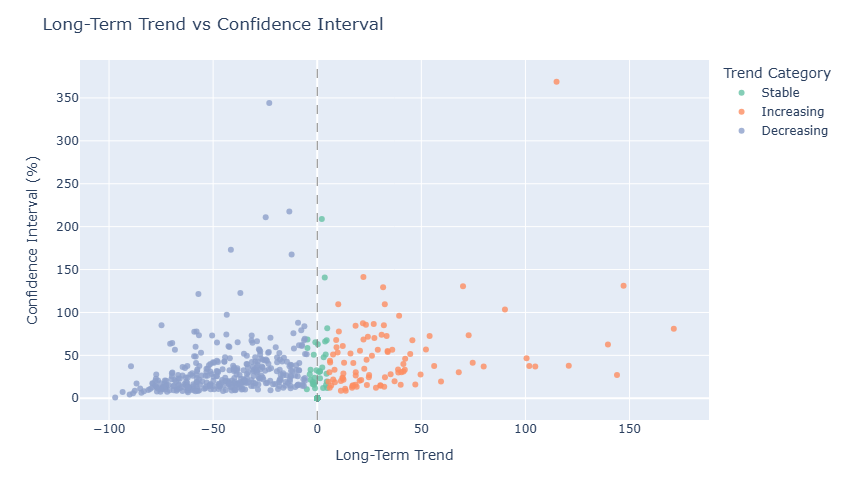

In [90]:
fig = px.scatter( birds_df, x='long_term_trend', y='long_term_trend_ci',
    color='long_term_trend_category',
    color_discrete_sequence=px.colors.qualitative.Set2,
    opacity=0.8,
    size_max=10,)

fig.update_layout(title='Long-Term Trend vs Confidence Interval',xaxis_title='Long-Term Trend',yaxis_title='Confidence Interval (%)',
    legend_title='Trend Category',
    width=800,
    height=500)
fig.add_vline(x=0, line_width=1, line_dash='dash', line_color='gray')

fig.show()


##### Most species have moderate confidence levels, but there’s a clear split — many species are declining, fewer are increasing, and only a small proportion are stable.

## Diet & Ecology

### Diet Type Distribution Across Migratory Status

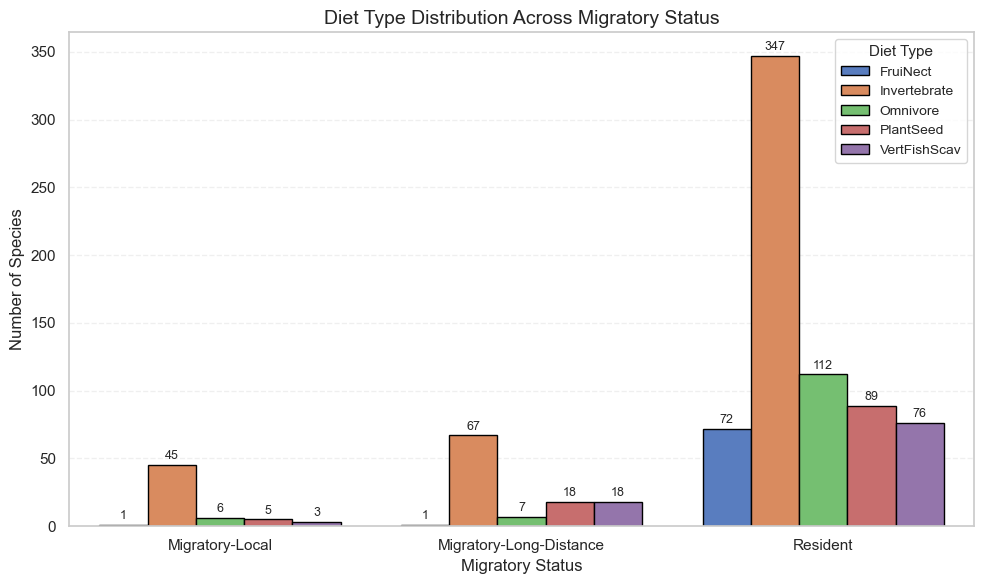

In [94]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=birds_df, x='migratory_status', hue='diet', palette='muted', edgecolor='black')

# Add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding=2)

plt.title('Diet Type Distribution Across Migratory Status', fontsize=14)
plt.xlabel('Migratory Status', fontsize=12)
plt.ylabel('Number of Species', fontsize=12)
plt.legend(title='Diet Type', fontsize=10, title_fontsize=11)
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

#### Regardless of migratory status, Invertebrate feeding is the most common diet type, but Resident species have a much more diverse diet compared to migratory species.

### Diet Type vs Conservation Concern

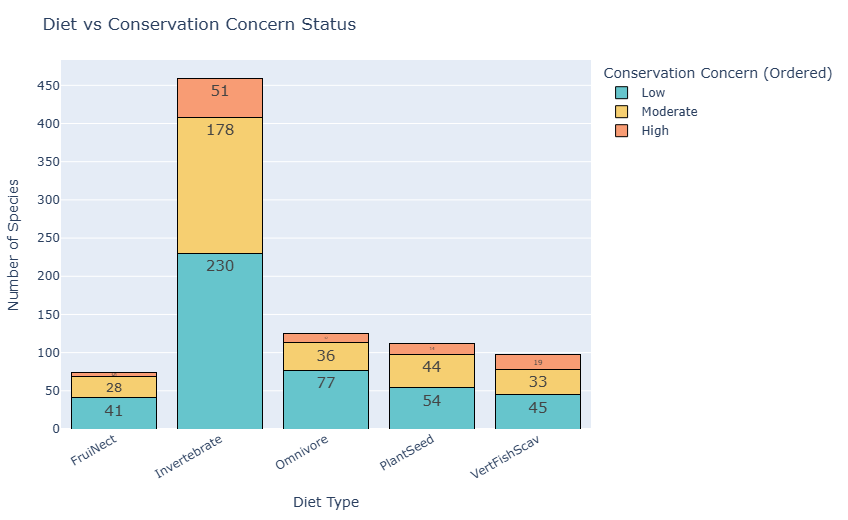

In [97]:
# Group by diet and conservation concern
diet_df = birds_df.groupby(['diet', 'status_of_conservation_concern']).size().reset_index(name='count')

# Define the desired order
custom_order = ['Low', 'Moderate', 'High']

# Plot
fig = px.bar(
    diet_df,
    x='diet',
    y='count',
    color='status_of_conservation_concern',
    title='Diet vs Conservation Concern Status',
    barmode='stack',
    text='count',
    category_orders={'status_of_conservation_concern': custom_order},
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Enhance appearance
fig.update_traces(textposition='inside', 
                  textfont_size=15,
                  marker_line_width=1,
    marker_line_color='black')

fig.update_layout(
    xaxis_title='Diet Type',
    yaxis_title='Number of Species',
    xaxis_tickangle=-30,
    height=520,
    width=880,
    legend_title_text='Conservation Concern (Ordered)',
    margin=dict(t=60, l=40, r=40, b=40)
)

fig.show()

##### Invertebrate feeders are the largest group but also have the most species at higher conservation risk. Fruit/Nectar feeders are least at risk, with no high concern species.

### Diet Type vs WLPA Schedule

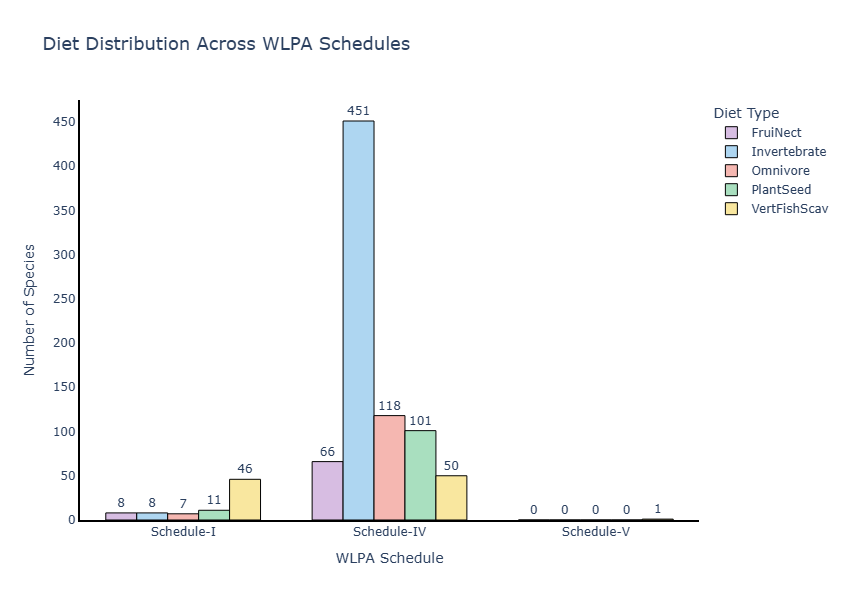

In [100]:
# Step 1: Group data
wlpa_diet_df = birds_df.groupby(['wlpa_schedule', 'diet']).size().reset_index(name='count')

# Step 2: Limit to top 5 most common diet types for clear coloring
top5_diets = wlpa_diet_df.groupby('diet')['count'].sum().sort_values(ascending=False).head(5).index
wlpa_diet_df = wlpa_diet_df[wlpa_diet_df['diet'].isin(top5_diets)]

# Step 3: Custom pastel colors for 5 diet types
pastel_colors = {
    top5_diets[0]: '#AED6F1',  # light blue
    top5_diets[1]: '#F5B7B1',  # soft red
    top5_diets[2]: '#A9DFBF',  # mint green
    top5_diets[3]: '#F9E79F',  # pastel yellow
    top5_diets[4]: '#D7BDE2'   # light purple
}

# Step 4: Plot
fig = px.bar(
    wlpa_diet_df,
    x='wlpa_schedule',
    y='count',
    color='diet',
    barmode='group',
    title='Diet Distribution Across WLPA Schedules',
    color_discrete_map=pastel_colors,
    text='count'  #  Add value labels
)

# Step 5: Beautify layout
fig.update_traces(
    textposition='outside',
    marker_line_width=1,
    marker_line_color='black'
)
fig.update_xaxes(
    showline=True,      # Show x-axis line
    linewidth=2,        # Line width
    linecolor='black',  # Line color
    showgrid=False,     # Hide vertical grid lines
    zeroline=False
)

fig.update_yaxes(
    showline=True,      # Show y-axis line
    linewidth=2,
    linecolor='black',
    showgrid=False,     # Hide horizontal grid lines
    zeroline=False
)

fig.update_layout(
     width=950,
    height=600,
    xaxis_title='WLPA Schedule',
    yaxis_title='Number of Species',
    title_font_size=18,
    legend_title='Diet Type',
    bargap=0.25,
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    plot_bgcolor='rgba(0,0,0,0)',
    legend=dict(
        orientation='v',yanchor='top',
        y=1.0,
        xanchor='left',
        x=1.02
    )
)

fig.show()

- Schedule I: Endangered species needing full protection.
- Schedule IV: Non-endangered but protected species.
- Schedule V: Vermin can be hunted without legal consequences.
##### VertFishScav has the highest no in Schedule -I and V but in schedule -IV Invertebrate has the highest no , In addition to VertFishScav needs the full protection

### Habitat Type vs Diet Type

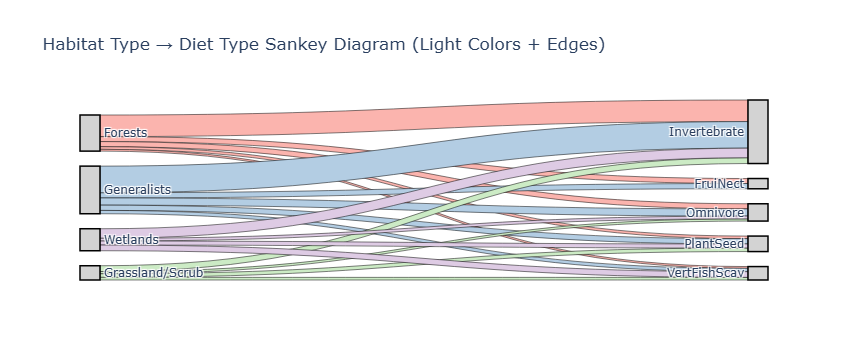

In [103]:
# Aggregate counts
sankey_df = birds_df.groupby(['habitat_type', 'diet']).size().reset_index(name='count')

# Create unique labels
labels = list(pd.unique(sankey_df['habitat_type'].tolist() + sankey_df['diet'].tolist()))

# Map source and target indices
sankey_df['source'] = sankey_df['habitat_type'].apply(lambda x: labels.index(x))
sankey_df['target'] = sankey_df['diet'].apply(lambda x: labels.index(x))

# Assign light pastel colors to each habitat type
pastel_colors = px.colors.qualitative.Pastel1
habitats = sankey_df['habitat_type'].unique()
habitat_color_map = {hab: pastel_colors[i % len(pastel_colors)] for i, hab in enumerate(habitats)}

# Map link colors based on their source habitat
link_colors = [habitat_color_map[src] for src in sankey_df['habitat_type']]

# Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=1.5),  # node edges
        label=labels,
        color="lightgray"  # neutral node color
    ),
    link=dict(
        source=sankey_df['source'],
        target=sankey_df['target'],
        value=sankey_df['count'],
        color=link_colors,
        line=dict(color='black', width=0.5)  # link edges
    )
))

fig.update_layout(
    title_text="Habitat Type → Diet Type Sankey Diagram (Light Colors + Edges)",
    font_size=12,
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.show()


##### Invertebrate-feeding birds dominate across all habitats, while other diet types occur in smaller proportions.

## Migratory Patterns

### Migratory Status Distribution

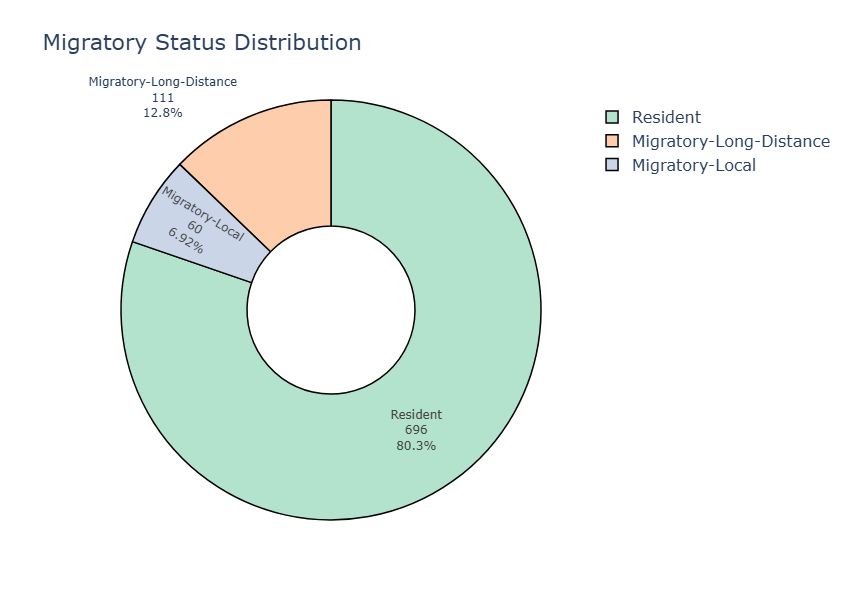

In [107]:
# Count species by migratory status
migratory_counts = birds_df['migratory_status'].value_counts().reset_index()
migratory_counts.columns = ['migratory_status', 'count']

# Donut chart
fig = px.pie(
    migratory_counts,
    names='migratory_status',
    values='count',
    color='migratory_status',
    color_discrete_sequence=px.colors.qualitative.Pastel2,
    hole=0.4,  # makes it a donut chart
    title='Migratory Status Distribution'
)

# Add black edges and values
fig.update_traces(
    textinfo='label+percent+value',
    textfont_size=12,
    marker=dict(line=dict(color='black', width=1.5))
)

# Layout styling
fig.update_layout(
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(size=16),
    height=600
)

fig.show()


##### Resident species make up the majority of the bird population, while migratory species form only a small fraction.

### Migratory Status vs Bird Group

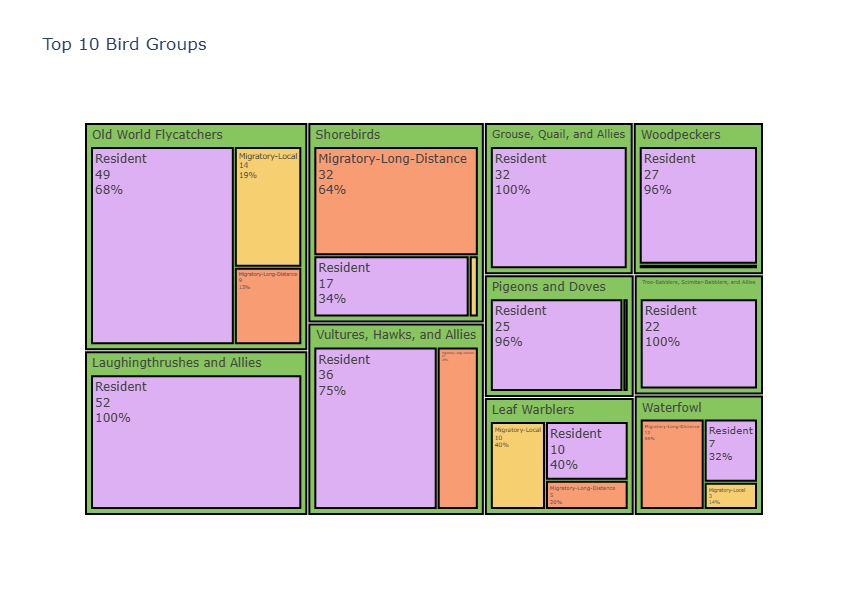

In [110]:
# Crosstab: Bird group vs migratory status
group_mig_ct = pd.crosstab(birds_df['group'], birds_df['migratory_status'])

# Select top 10 groups by total species
top_groups = group_mig_ct.sum(axis=1).sort_values(ascending=False).head(10).index
filtered_ct = group_mig_ct.loc[top_groups]

# Convert to long format for treemap
df_long = filtered_ct.reset_index().melt(id_vars='group', var_name='migratory_status', value_name='count')

# Treemap
fig = px.treemap(
    df_long,
    path=['group', 'migratory_status'],  # hierarchy: group → migratory status
    values='count',
    color='migratory_status',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    labels={'count':'Number of Species', 'group':'Bird Group', 'migratory_status':'Migratory Status'},
    title='Top 10 Bird Groups '
)

# Add black edges
# fig.update_traces(marker=dict(line=dict(color='black', width=1.5)))
# Add black edges and show values on rectangles + hover
fig.update_traces(
    marker=dict(line=dict(color='black', width=2)),
    textinfo="label+value+percent parent",  # shows label, value, % of parent
    hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Percent of group: %{percentParent:.1%}<extra></extra>')
# Layout styling
fig.update_layout(
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(size=12),
    height=600
)

fig.show()


### Migratory Status vs Habitat Type

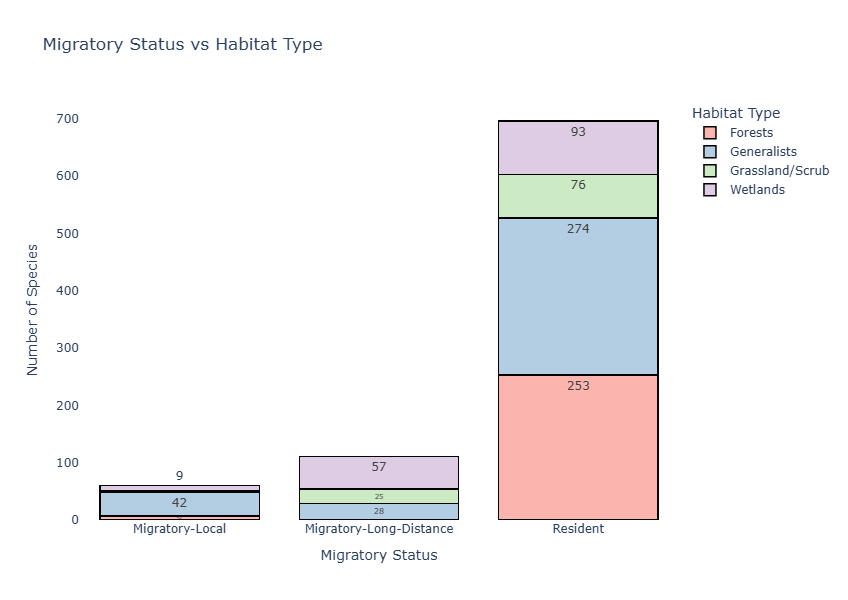

In [112]:
df = birds_df.groupby(['migratory_status', 'habitat_type']).size().reset_index(name='count')

fig = px.bar(
    df,
    x='migratory_status',
    y='count',
    color='habitat_type',
    text='count',
    barmode='stack',
    color_discrete_sequence=px.colors.qualitative.Pastel1,
    labels={'count':'Number of Species', 'migratory_status':'Migratory Status', 'habitat_type':'Habitat Type'},
    title='Migratory Status vs Habitat Type'
)

fig.update_traces(marker=dict(line=dict(color='black', width=1.5)))
fig.update_layout(plot_bgcolor='white', paper_bgcolor='white', font=dict(size=12), height=600)
fig.show()


##### Resident birds are spread across all habitats, whereas migratory species are fewer and mainly associated with generalist.

### Migratory Status vs Conservation Concern

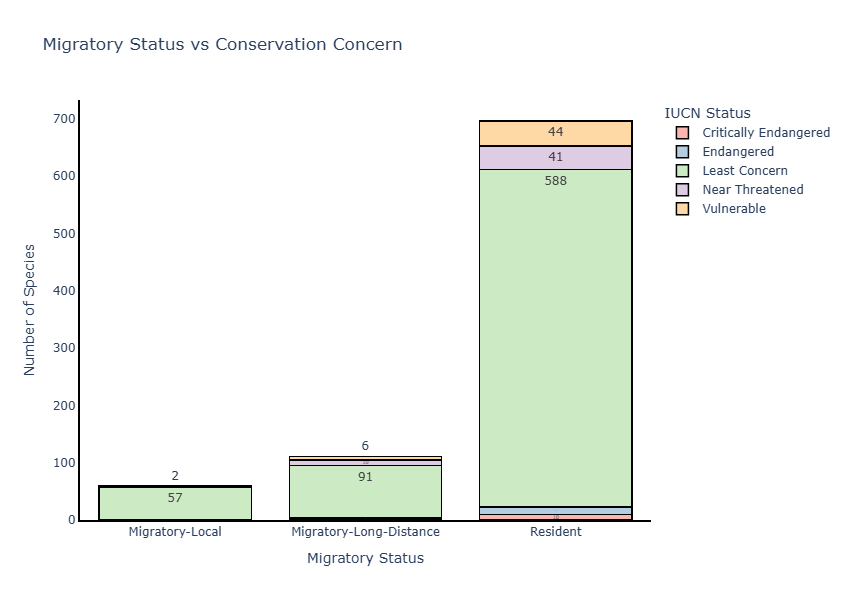

In [115]:
# Group by migratory status and conservation concern (IUCN)
df = birds_df.groupby(['migratory_status', 'iucn_status']).size().reset_index(name='count')

# Stacked bar chart
fig = px.bar(
    df,
    x='migratory_status',
    y='count',
    color='iucn_status',
    text='count',
    barmode='stack',
    color_discrete_sequence=px.colors.qualitative.Pastel1,
    labels={'count':'Number of Species', 'migratory_status':'Migratory Status', 'iucn_status':'IUCN Status'},
    title='Migratory Status vs Conservation Concern'
)

# Add black edges and value labels
fig.update_traces(marker=dict(line=dict(color='black', width=1.5)))

# Layout
fig.update_layout(
    xaxis=dict(showline=True, linecolor='black', linewidth=2, showgrid=False),
    yaxis=dict(showline=True, linecolor='black', linewidth=2, showgrid=False),
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=12),
    hovermode='x unified',
    height=600
)

fig.show()


##### Most resident and migratory species are of Least Concern, with only a very small share falling into Critically Endangered categories.

In [117]:
birds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   bird_name                       867 non-null    object  
 1   group                           867 non-null    category
 2   iucn_status                     867 non-null    category
 3   wlpa_schedule                   867 non-null    category
 4   analysed_long_term              867 non-null    int64   
 5   analysed_current                867 non-null    int64   
 6   long_term_trend                 867 non-null    float64 
 7   long_term_trend_ci              867 non-null    float64 
 8   current_annual_change           867 non-null    float64 
 9   current_annual_change_ci        867 non-null    float64 
 10  long_term_status                867 non-null    category
 11  current_status                  867 non-null    category
 12  distribution_status   

 <!-- ##  Correlation -->

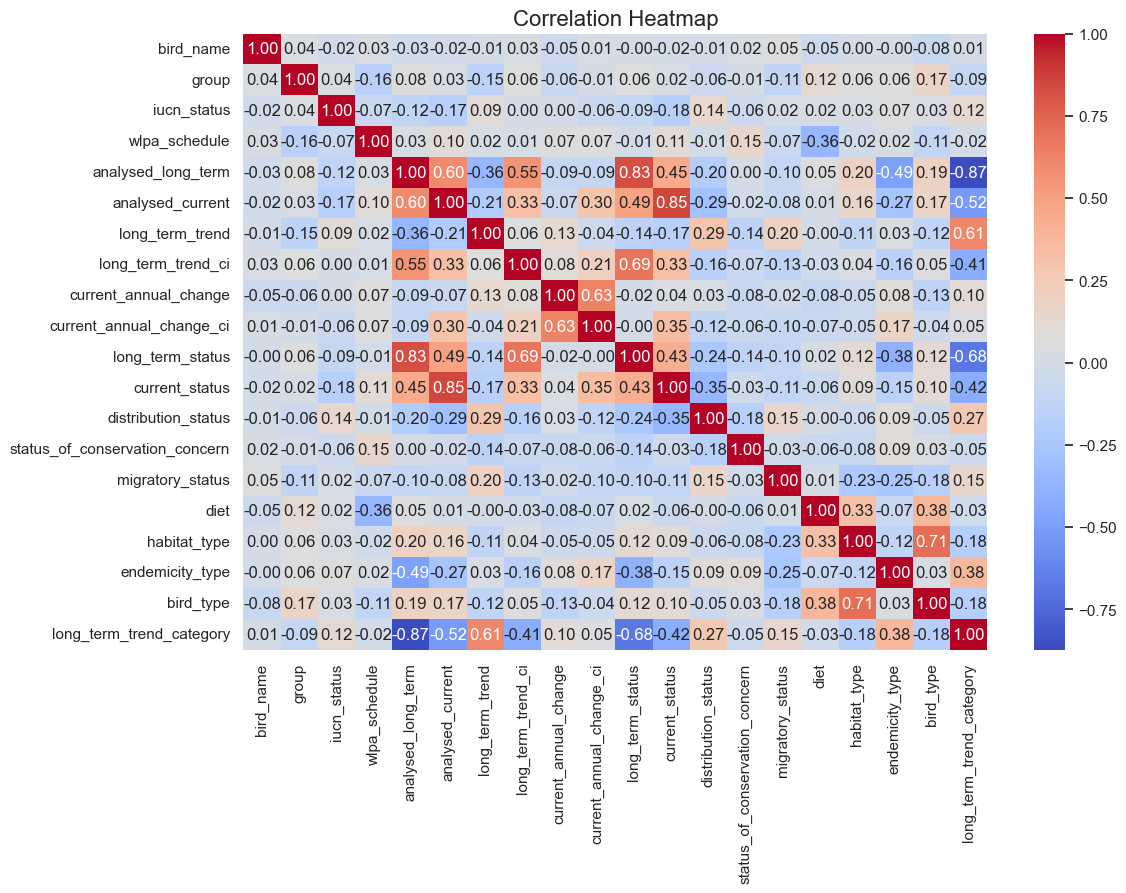

In [119]:
# Encode categorical (only for correlation purpose)
categorical_cols = birds_df.select_dtypes(include=['category', 'object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    birds_df[col] = le.fit_transform(birds_df[col])
    label_encoders[col] = le  

# Correlation Matrix
corr_matrix = birds_df.corr(numeric_only=True)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,cmap="coolwarm",annot=True,fmt=".2f",cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()



 Top 5 Correlated Feature Pairs:
current_status            analysed_current         0.853226
analysed_long_term        long_term_status         0.825260
habitat_type              bird_type                0.709372
long_term_status          long_term_trend_ci       0.686885
current_annual_change_ci  current_annual_change    0.630826
dtype: float64


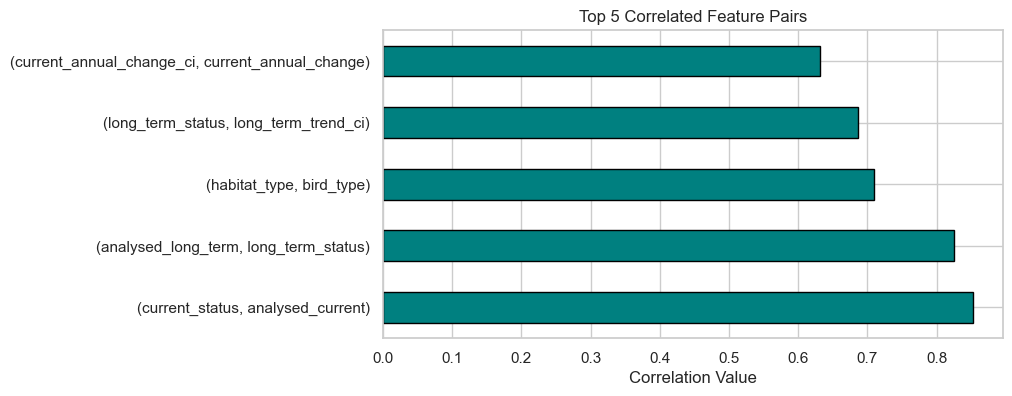

In [120]:
# Top 5 Correlated Pairs
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)

# Remove self correlations
corr_pairs = corr_pairs[corr_pairs < 1]

# Remove duplicate pairs (A-B and B-A)
corr_pairs = corr_pairs.drop_duplicates()

top_5_corr = corr_pairs.head(5)
print("\n Top 5 Correlated Feature Pairs:")
print(top_5_corr)

#Barplot of top 5
top_5_corr.plot(kind="barh", figsize=(8,4), color="teal", edgecolor="black")
plt.title("Top 5 Correlated Feature Pairs")
plt.xlabel("Correlation Value")
plt.show()

In [121]:
# birds_df.info()

# Machine Learning

### Droping Unnecessary Columns

In [124]:
# Drop unnecessary columns
birds_df = birds_df.drop(columns=['bird_name',*birds_df.columns[19:]])  


In [125]:
birds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   group                           867 non-null    int32  
 1   iucn_status                     867 non-null    int32  
 2   wlpa_schedule                   867 non-null    int32  
 3   analysed_long_term              867 non-null    int64  
 4   analysed_current                867 non-null    int64  
 5   long_term_trend                 867 non-null    float64
 6   long_term_trend_ci              867 non-null    float64
 7   current_annual_change           867 non-null    float64
 8   current_annual_change_ci        867 non-null    float64
 9   long_term_status                867 non-null    int32  
 10  current_status                  867 non-null    int32  
 11  distribution_status             867 non-null    int32  
 12  status_of_conservation_concern  867 

## Preprocessing Data (Split + Encoding + Scaling )

In [127]:
# First split: Train+Val and Test
train_val_df, test_df = train_test_split(birds_df, test_size=0.2, random_state=42)

# Second split: Train and Validation
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [128]:
print('train_df.shape:', train_df.shape)
print('val_df.shape:', val_df.shape)
print('test_df.shape:', test_df.shape)

train_df.shape: (519, 18)
val_df.shape: (174, 18)
test_df.shape: (174, 18)


In [129]:
target_col = 'status_of_conservation_concern'
train_df = train_df.dropna(subset=[target_col])   # Drop rows with missing target

##### Inputs and Targets

In [131]:
train_input = train_df.drop(columns=[target_col])
train_target = train_df[target_col]

In [132]:
val_input = val_df.drop(columns=[target_col])
val_target = val_df[target_col]

In [133]:
test_input = test_df.drop(columns=[target_col])
test_target = test_df[target_col]

##### Identify Column Types

In [135]:
numeric_cols = train_input.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_input.select_dtypes('category').columns.tolist()

In [136]:
print(numeric_cols)

['group', 'iucn_status', 'wlpa_schedule', 'analysed_long_term', 'analysed_current', 'long_term_trend', 'long_term_trend_ci', 'current_annual_change', 'current_annual_change_ci', 'long_term_status', 'current_status', 'distribution_status', 'migratory_status', 'diet', 'habitat_type', 'endemicity_type', 'bird_type']


In [137]:
print(categorical_cols)

[]


#### Label encoding on target data

In [139]:
target_encoder = LabelEncoder()
train_target = target_encoder.fit_transform(train_target)
val_target   = target_encoder.transform(val_target)
test_target  = target_encoder.transform(test_target)

##### Scaling Numeric Features

In [141]:
from sklearn.preprocessing import MinMaxScaler

In [142]:
scaler = MinMaxScaler().fit(birds_df[numeric_cols])

In [143]:
train_input[numeric_cols] = scaler.transform(train_input[numeric_cols])
val_input[numeric_cols] = scaler.transform(val_input[numeric_cols])
test_input[numeric_cols] = scaler.transform(test_input[numeric_cols])

In [144]:
val_input.describe().loc[['min','max']]

,group,iucn_status,wlpa_schedule,analysed_long_term,analysed_current,long_term_trend,long_term_trend_ci,current_annual_change,current_annual_change_ci,long_term_status,current_status,distribution_status,migratory_status,diet,habitat_type,endemicity_type,bird_type
min,0.025,0.0,0.0,0.0,0.0,0.013264,0.000000,0.035249,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.000,1.0,0.5,1.0,1.0,0.882111,0.590056,0.250246,0.300895,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


##### Encoding Categorical Data

In [146]:
from sklearn.preprocessing import OneHotEncoder

In [147]:
train_input[categorical_cols] = train_input[categorical_cols]
val_input[categorical_cols] = val_input[categorical_cols]
test_input[categorical_cols] = test_input[categorical_cols]

In [148]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown= 'ignore').fit(train_input[categorical_cols])

In [149]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [150]:
train_input[encoded_cols] = encoder.transform(train_input[categorical_cols])
val_input[encoded_cols] = encoder.transform(val_input[categorical_cols])
test_input[encoded_cols] = encoder.transform(test_input[categorical_cols])

In [151]:
test_input

,group,iucn_status,wlpa_schedule,analysed_long_term,analysed_current,long_term_trend,long_term_trend_ci,current_annual_change,current_annual_change_ci,long_term_status,current_status,distribution_status,migratory_status,diet,habitat_type,endemicity_type,bird_type
361,0.1750,0.50,0.5,1.0,1.0,0.247267,0.088938,0.114467,0.021650,1.000000,1.000000,0.4,1.0,0.50,0.333333,0.333333,0.000000
422,0.4375,0.50,0.5,1.0,1.0,0.312019,0.100946,0.106802,0.018234,1.000000,1.000000,0.2,1.0,0.50,0.666667,0.000000,0.000000
67,0.9000,0.50,0.0,1.0,1.0,0.386655,0.040632,0.103775,0.005363,0.500000,1.000000,0.2,1.0,1.00,0.333333,0.333333,0.666667
779,0.3500,0.50,0.5,1.0,1.0,0.213062,0.096905,0.088766,0.022595,1.000000,1.000000,0.4,1.0,0.25,1.000000,0.333333,1.000000
394,0.7125,0.50,0.5,1.0,1.0,0.128729,0.040182,0.056439,0.011137,0.166667,0.666667,0.2,1.0,0.25,0.666667,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,0.8375,1.00,0.5,0.0,0.0,0.361693,0.000000,0.111686,0.000000,0.000000,0.000000,1.0,1.0,0.25,0.333333,0.666667,0.000000
542,0.3875,0.50,0.0,1.0,1.0,0.444468,0.185972,0.111405,0.024168,1.000000,1.000000,0.4,1.0,0.00,0.333333,0.333333,0.000000
247,0.9000,0.25,0.5,1.0,1.0,0.140003,0.037912,0.070566,0.011630,0.166667,0.666667,0.2,1.0,1.00,0.666667,0.333333,0.666667
760,0.9125,0.50,0.5,1.0,1.0,0.173506,0.198027,0.138736,0.079856,1.000000,1.000000,0.2,0.0,0.25,0.333333,0.666667,0.000000


##### Final input data

In [153]:
X_train = train_input[numeric_cols + encoded_cols]
X_val = val_input[numeric_cols + encoded_cols]
X_test = test_input[numeric_cols + encoded_cols]

# Decision Tree Model

### Model Training

In [156]:
from sklearn.tree import DecisionTreeClassifier

In [157]:
model = DecisionTreeClassifier(random_state = 42)

In [158]:
model.fit(X_train, train_target)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Evaluation

In [160]:
def evaluate_model(y_true, y_pred, dataset_name="Dataset"):
    print(f"\n {dataset_name} Results")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_true, y_pred, average='weighted'))
    print("F1-Score :", f1_score(y_true, y_pred, average='weighted'))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# Validation
val_preds = model.predict(X_val)
evaluate_model(val_target, val_preds, "Validation")

# Test
test_preds = model.predict(X_test)
evaluate_model(test_target, test_preds, "Test")


 Validation Results
Accuracy : 0.9770114942528736
Precision: 0.9775676677790137
Recall   : 0.9770114942528736
F1-Score : 0.9769386916079963

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.99      0.99      0.99        91
           2       0.95      0.98      0.97        60

    accuracy                           0.98       174
   macro avg       0.98      0.96      0.97       174
weighted avg       0.98      0.98      0.98       174


 Test Results
Accuracy : 0.9137931034482759
Precision: 0.9160188005544738
Recall   : 0.9137931034482759
F1-Score : 0.9130726798457025

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.79        21
           1       0.97      0.95      0.96        94
           2       0.85      0.93      0.89        59

    accuracy                           0.91       174
   macro avg       0.90

### Feature Importance

In [162]:
model.feature_importances_

array([0.00878909, 0.18131838, 0.        , 0.        , 0.        ,
       0.15204391, 0.01224556, 0.08317196, 0.02381384, 0.1878671 ,
       0.24776236, 0.08538473, 0.        , 0.00329591, 0.        ,
       0.01430718, 0.        ])

In [163]:
importance_df = pd.DataFrame({
    'feature':X_train.columns,
    'importance':model.feature_importances_
}).sort_values('importance', ascending = False)

In [164]:
importance_df.head(10)

,feature,importance
10,current_status,0.247762
9,long_term_status,0.187867
1,iucn_status,0.181318
5,long_term_trend,0.152044
11,distribution_status,0.085385
7,current_annual_change,0.083172
8,current_annual_change_ci,0.023814
15,endemicity_type,0.014307
6,long_term_trend_ci,0.012246
0,group,0.008789


#### Top 5 Feature Importance 

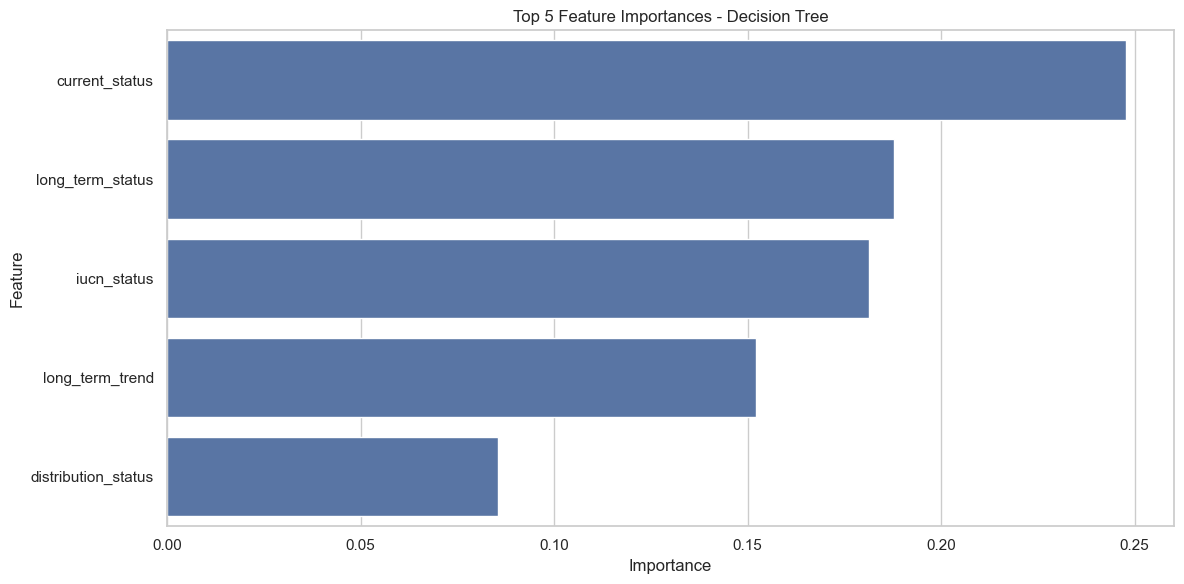

In [166]:
importances = model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:5], y=feature_names[indices][:5])
plt.title("Top 5 Feature Importances - Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## Random Forest

#### Model Training 

In [169]:
rf_model =RandomForestClassifier(n_jobs = -1, random_state = 42)

In [170]:
rf_model.fit(X_train, train_target)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [171]:
# Evaluation Function 
def evaluate_model(y_true, y_pred, dataset_name="Dataset"):
    print(f"\n📊 {dataset_name} Results")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_true, y_pred, average='weighted'))
    print("F1-Score :", f1_score(y_true, y_pred, average='weighted'))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# Validation
val_preds = rf_model.predict(X_val)
evaluate_model(val_target, val_preds, "Validation (RF)")

# Test
test_preds = rf_model.predict(X_test)
evaluate_model(test_target, test_preds, "Test (RF)")



📊 Validation (RF) Results
Accuracy : 0.9597701149425287
Precision: 0.9604458252586462
Recall   : 0.9597701149425287
F1-Score : 0.9592468265815609

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        23
           1       0.96      1.00      0.98        91
           2       0.95      0.93      0.94        60

    accuracy                           0.96       174
   macro avg       0.97      0.93      0.95       174
weighted avg       0.96      0.96      0.96       174


📊 Test (RF) Results
Accuracy : 0.9540229885057471
Precision: 0.9544555679149672
Recall   : 0.9540229885057471
F1-Score : 0.9534164894666461

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        21
           1       0.98      0.98      0.98        94
           2       0.92      0.97      0.94        59

    accuracy                           0.95       174
   macro av

#### Feature Importance

In [173]:
rf_model.feature_importances_

array([0.03409248, 0.10861627, 0.01535979, 0.01463639, 0.04617368,
       0.13414679, 0.0651126 , 0.08997193, 0.10523645, 0.08209693,
       0.10168831, 0.11852204, 0.00786087, 0.01831118, 0.02584527,
       0.01851324, 0.0138158 ])

In [174]:
importance_df = pd.DataFrame({
   'feature': X_train.columns,
   'importance': rf_model.feature_importances_
}).sort_values('importance', ascending = False)

In [175]:
importance_df.head(10)

,feature,importance
5,long_term_trend,0.134147
11,distribution_status,0.118522
1,iucn_status,0.108616
8,current_annual_change_ci,0.105236
10,current_status,0.101688
7,current_annual_change,0.089972
9,long_term_status,0.082097
6,long_term_trend_ci,0.065113
4,analysed_current,0.046174
0,group,0.034092


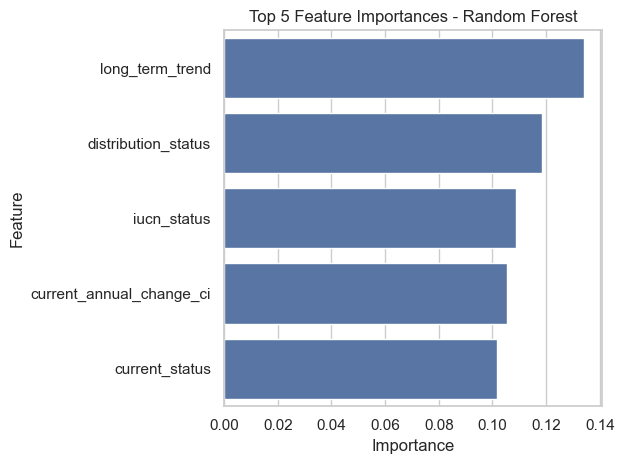

In [176]:
importances = rf_model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]
# plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:5], y=feature_names[indices][:5])
plt.title("Top 5 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

##  XGBoost Model 

In [178]:
xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',
    max_depth=5,
    n_estimators=200,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1
)

xgb_model.fit(X_train, train_target)

# Validation Predictions & Evaluation
val_preds_xgb = xgb_model.predict(X_val)
evaluate_model(val_target, val_preds_xgb, "Validation (XGBoost)")

# Test Predictions & Evaluation
test_preds_xgb = xgb_model.predict(X_test)
evaluate_model(test_target, test_preds_xgb, "Test (XGBoost)")



📊 Validation (XGBoost) Results
Accuracy : 0.9597701149425287
Precision: 0.9605177580432417
Recall   : 0.9597701149425287
F1-Score : 0.959459848203901

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        23
           1       0.97      0.99      0.98        91
           2       0.93      0.95      0.94        60

    accuracy                           0.96       174
   macro avg       0.97      0.94      0.95       174
weighted avg       0.96      0.96      0.96       174


📊 Test (XGBoost) Results
Accuracy : 0.9712643678160919
Precision: 0.9714805055607222
Recall   : 0.9712643678160919
F1-Score : 0.9711995780293411

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.99      0.98      0.98        94
           2       0.95      0.98      0.97        59

    accuracy                           0.97       174
  

### Feature Importance

In [180]:
xgb_model.feature_importances_

array([0.00879719, 0.08404327, 0.02512093, 0.07368451, 0.32588294,
       0.06543424, 0.03535179, 0.03793797, 0.03187027, 0.07424393,
       0.10376566, 0.07090555, 0.00531045, 0.01374866, 0.01085049,
       0.02113338, 0.01191873], dtype=float32)

### Top 5 Feature Importance 

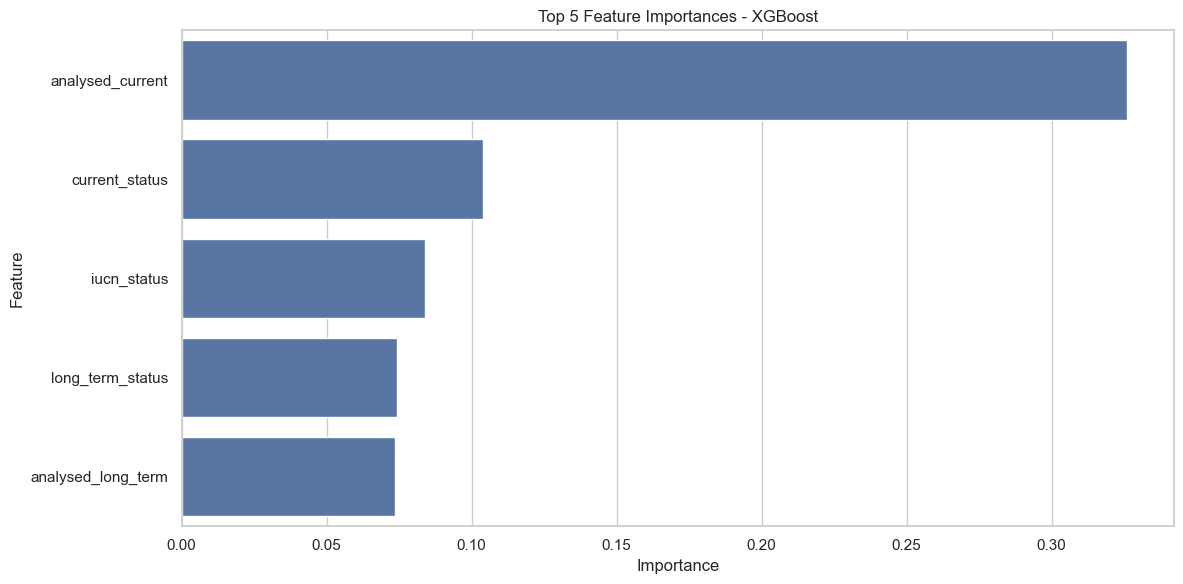

In [182]:
importances = xgb_model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:5], y=feature_names[indices][:5])
plt.title("Top 5 Feature Importances - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## Making Prediction

In [184]:
birds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   group                           867 non-null    int32  
 1   iucn_status                     867 non-null    int32  
 2   wlpa_schedule                   867 non-null    int32  
 3   analysed_long_term              867 non-null    int64  
 4   analysed_current                867 non-null    int64  
 5   long_term_trend                 867 non-null    float64
 6   long_term_trend_ci              867 non-null    float64
 7   current_annual_change           867 non-null    float64
 8   current_annual_change_ci        867 non-null    float64
 9   long_term_status                867 non-null    int32  
 10  current_status                  867 non-null    int32  
 11  distribution_status             867 non-null    int32  
 12  status_of_conservation_concern  867 

In [186]:
import joblib
# ===========================================
# 2. Load Dataset
# ===========================================
birds_df = pd.read_excel("my_data.xlsx")

# Define columns
categorical_cols = [
    'group', 'migratory_status', 'diet', 'habitat_type',
    'wlpa_schedule', 'iucn_status', 'long_term_status',
    'current_status', 'distribution_status', 'endemicity_type', 'bird_type'
]
numeric_cols = [
    'analysed_long_term', 'analysed_current',
    'long_term_trend', 'current_annual_change'
]
target_col = 'status_of_conservation_concern'

# Make sure categorical columns are strings
for col in categorical_cols:
    birds_df[col] = birds_df[col].astype(str)

# Drop missing target values
birds_df = birds_df.dropna(subset=[target_col])

# ===========================================
# 3. Encode Target
# ===========================================
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(birds_df[target_col])
X = birds_df[categorical_cols + numeric_cols]

# Save target encoder
joblib.dump(target_encoder, "target_encoders.pkl")

# ===========================================
# 4. Split Data
# ===========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# ===========================================
# 5. Preprocessor
# ===========================================
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])

# ===========================================
# 6. Build Pipeline with XGBoost
# ===========================================
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', XGBClassifier(
        objective="multi:softprob",
        eval_metric="mlogloss",
        num_class=len(target_encoder.classes_), 
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1
    ))
])

# ===========================================
# 7. Train Model
# ===========================================
pipeline.fit(X_train, y_train)

# Save trained pipeline
joblib.dump(pipeline, "bird_conservation_model_xgb.pkl")
print("✅ XGBoost Model and encoder saved successfully!")

# ===========================================
# 8. Prediction Function
# ===========================================
def predict_status(bird_info, model_path="bird_conservation_model_xgb.pkl", 
                   encoder_path="target_encoders.pkl"):

    # Load model + encoder
    pipeline = joblib.load(model_path)
    target_encoder = joblib.load(encoder_path)

    # Convert dict to DataFrame
    new_input_df = pd.DataFrame([bird_info])

    # Prediction
    prediction = pipeline.predict(new_input_df)[0]
    prediction_proba = pipeline.predict_proba(new_input_df)[0]

    # Decode label + get confidence
    pred_label = target_encoder.inverse_transform([prediction])[0]
    confidence = prediction_proba[prediction]

    return pred_label, round(confidence, 4)

# ===========================================
# 9. Example Usage
# ===========================================
bird_info = {
    'group': 'Waterbirds',
    'iucn_status': 'Least Concern',
    'wlpa_schedule': 'Schedule IV',
    'analysed_long_term': 1,
    'analysed_current': 1,
    'long_term_trend': -25.3,
    'current_annual_change': -2.7,
    'long_term_status': 'Decreasing',
    'current_status': 'Stable',
    'distribution_status': 'Widespread',
    'migratory_status': 'Migrant',
    'diet': 'Omnivore',
    'habitat_type': 'Wetland',
    'endemicity_type': 'Not Endemic',
    'bird_type': 'Waterbirds'
}

result, confidence = predict_status(bird_info)
print(f"Predicted Conservation Status (XGBoost): {result} (Confidence: {confidence*100:.2f}%)")


✅ XGBoost Model and encoder saved successfully!
Predicted Conservation Status (XGBoost): Low (Confidence: 72.83%)


## Comparison Between Models 

In [ ]:
# Base accuracies
accuracies = {
     "Decision Tree": 0.913,
    "Random Forest": 0.954,
    "XGBoost": 0.971
}

# Step 1: Print all values
print(" Model Accuracy Comparison:\n")
for model, acc in accuracies.items():
    print(f"{model:<25} : {acc*100:.2f}%")

# Step 2: Plot
plt.figure(figsize=(12, 6))
sns.set_style("white")

# Extract model names and scores
model_names = list(accuracies.keys())
model_scores = list(accuracies.values())

# Plot bars with pastel colors and black edge
bars = sns.barplot(
    x=model_names,
    y=model_scores,
    palette="pastel",
    edgecolor='black'
)

# Add value labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(
        f'{height*100:.2f}%',
        (bar.get_x() + bar.get_width() / 2, height),
        ha='center', va='bottom',
        fontsize=11, fontweight='bold'
    )

# Clean styling
plt.ylim(0.70, 1.00)  #  adjusted lower limit
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.title("Model Accuracy Comparison", fontsize=14, weight='bold')
plt.xticks(rotation=15)
plt.gca().set_facecolor("white")
plt.grid(False)  #  removed grid
plt.tight_layout()

plt.show()


### downloading encoder file for streamlit

In [ ]:
# In Jupyter Notebook
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Load data
birds_df = pd.read_excel("my_data.xlsx")

# Define columns
categorical_cols = ['group', 'migratory_status', 'diet', 'habitat_type',
                    'wlpa_schedule', 'iucn_status', 'long_term_status',
                    'current_status', 'distribution_status', 'endemicity_type', 'bird_type']
numeric_cols = ['analysed_long_term', 'analysed_current', 'long_term_trend', 'current_annual_change']
target_col = 'status_of_conservation_concern'

# Drop NA target
birds_df = birds_df.dropna(subset=[target_col])

# Encode target
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(birds_df[target_col])
X = birds_df[categorical_cols + numeric_cols]

# Save target encoder
joblib.dump(target_encoder, "target_encoders5.pkl")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])

# Build pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier(
        max_depth=8, min_samples_leaf=3, class_weight={0: 5, 1: 1, 2: 1},
        random_state=42, n_jobs=-1
    ))
])

# Train model
pipeline.fit(X_train, y_train)

# Save pipeline
joblib.dump(pipeline, "bird_conservation_model5.pkl")

print("✅ Model and encoder saved")


In [ ]:
birds_df['status_of_conservation_concern'].value_counts()